In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Read the data and plot the distribution of the Target in application_train.csv using a Pie Chart.

In [2]:
train = pd.read_csv('/kaggle/input/credit-risk/application_train.csv')
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


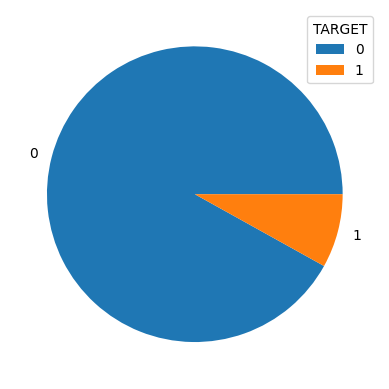

In [3]:
app_train = train
prop = app_train['TARGET'].value_counts()
plt.pie(prop, labels = ['0','1'])
plt.legend(title = 'TARGET', loc = 'upper right')
plt.show()

# 2. Handle missing values

### Drop none value in every column

In [4]:
train.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [5]:
app_train = app_train.dropna()
app_train = app_train.drop(columns = ['SK_ID_CURR'])

# 3. Encode categorical data using One Hot encoding

In [6]:
# Number of integar variables
int_col = app_train.select_dtypes(include=['int']).columns.tolist() 
# Number of float variables
float_col = app_train.select_dtypes(include=['float']).columns.tolist()
# Number of numerical variables
num_col = app_train.select_dtypes(exclude=['object']).columns.tolist()
# Number of categorical variables
cate_col = app_train.select_dtypes(include=['object']).columns.tolist()

# train set One Hot encoding use the categorical variable list
app_train_encoded = pd.get_dummies(app_train, columns = cate_col).astype(int)
app_train_encoded

print('There are totally', len(int_col), 'int columns in the dataset.')
print('There are totally', len(float_col), 'float columns in the dataset.')
print('There are totally', len(num_col), 'numerical columns in the dataset.')
print('There are totally', len(cate_col), 'categorical columns in the dataset.')
print('There are totally', len(app_train.columns), 'columns in the dataset.')

print('There are totally', len(app_train_encoded.columns), 'columns in the One Hot encoded dataset.')

There are totally 40 int columns in the dataset.
There are totally 65 float columns in the dataset.
There are totally 105 numerical columns in the dataset.
There are totally 16 categorical columns in the dataset.
There are totally 121 columns in the dataset.
There are totally 234 columns in the One Hot encoded dataset.


## 4. Align train and test datasets

In [7]:
# import application test set
test = pd.read_csv('/kaggle/input/credit-risk/application_test.csv')

# test set One Hot encoding use the categorical variable list
app_test_encoded = pd.get_dummies(test, columns = cate_col)

## 5. Detects data anomalies, such as birth dates, employment lengths, etc

In [8]:
# Find numerical variable column, not int or object, without id column
anom_num_col = app_train.select_dtypes(exclude=['int', 'object']).columns.tolist()

# Find numerical variable column, not int or object, without id column
anom_num_col = app_train.select_dtypes(exclude=['int', 'object']).columns.tolist()# Find valuable numerical column for anomlity analysis
def find_anomalies(data):
    anomalies = []
    data_std = np.std(data)
    data_mean = np.mean(data)
    anomaly_cut_off = data_std * 3
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [9]:
# what kind of the variables require check for anomalies? probably float
anom_list = []

for i in range(0, len(float_col)):
    anom_col = find_anomalies(app_train[float_col[i]])
    anom_list.append(anom_col)

len(anom_num_col)
anom_pd = pd.DataFrame(anom_list, index = float_col).T
anom_pd

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,810000.0,2695500.0,94509.0,2250000.0,NaN,-14236.0,64.0,7.0,NaN,0.034742,...,3.0,9.0,3.0,-3732.0,1.0,1.0,1.0,6.0,4.0,8.0
1,810000.0,2517300.0,110488.5,2047500.0,NaN,-14168.0,64.0,6.0,NaN,0.019849,...,2.0,9.0,2.0,-3841.0,1.0,1.0,1.0,4.0,3.0,8.0
2,720000.0,2517300.0,108805.5,2250000.0,NaN,-14795.0,64.0,6.0,NaN,0.004635,...,2.0,9.0,2.0,-4131.0,1.0,3.0,1.0,4.0,4.0,8.0
3,810000.0,2250000.0,91147.5,2250000.0,NaN,-14990.0,65.0,6.0,NaN,0.004154,...,2.0,8.0,2.0,-4092.0,1.0,1.0,1.0,11.0,3.0,8.0
4,675000.0,2303460.0,95463.0,2250000.0,NaN,-14426.0,65.0,6.0,NaN,0.028189,...,2.0,8.0,2.0,-3841.0,1.0,1.0,1.0,4.0,3.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,NaN,NaN,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,NaN,NaN,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,NaN,NaN,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329,NaN,NaN,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 6. Use Pearson correlation coefficient to preliminarily check the correlation between data entries and the Target

In [10]:
# Use Pearson Correlation Coefficient to check correlation betwen each data columns and the target column
# Value of 1.0 is the correlation to the column itself, drop it, the number of column will be 235 - 1 = 234
train_pcorr = app_train_encoded.corr(method = 'pearson')
train_pcorr_no_target = train_pcorr['TARGET'].drop(index = ['TARGET'])
train_pcorr_no_target = abs(train_pcorr_no_target)

## 7. From the correlation data obtained in the previous step, further select some strongly correlated data and visualize them using KDE distributions, grouped histograms, etc.

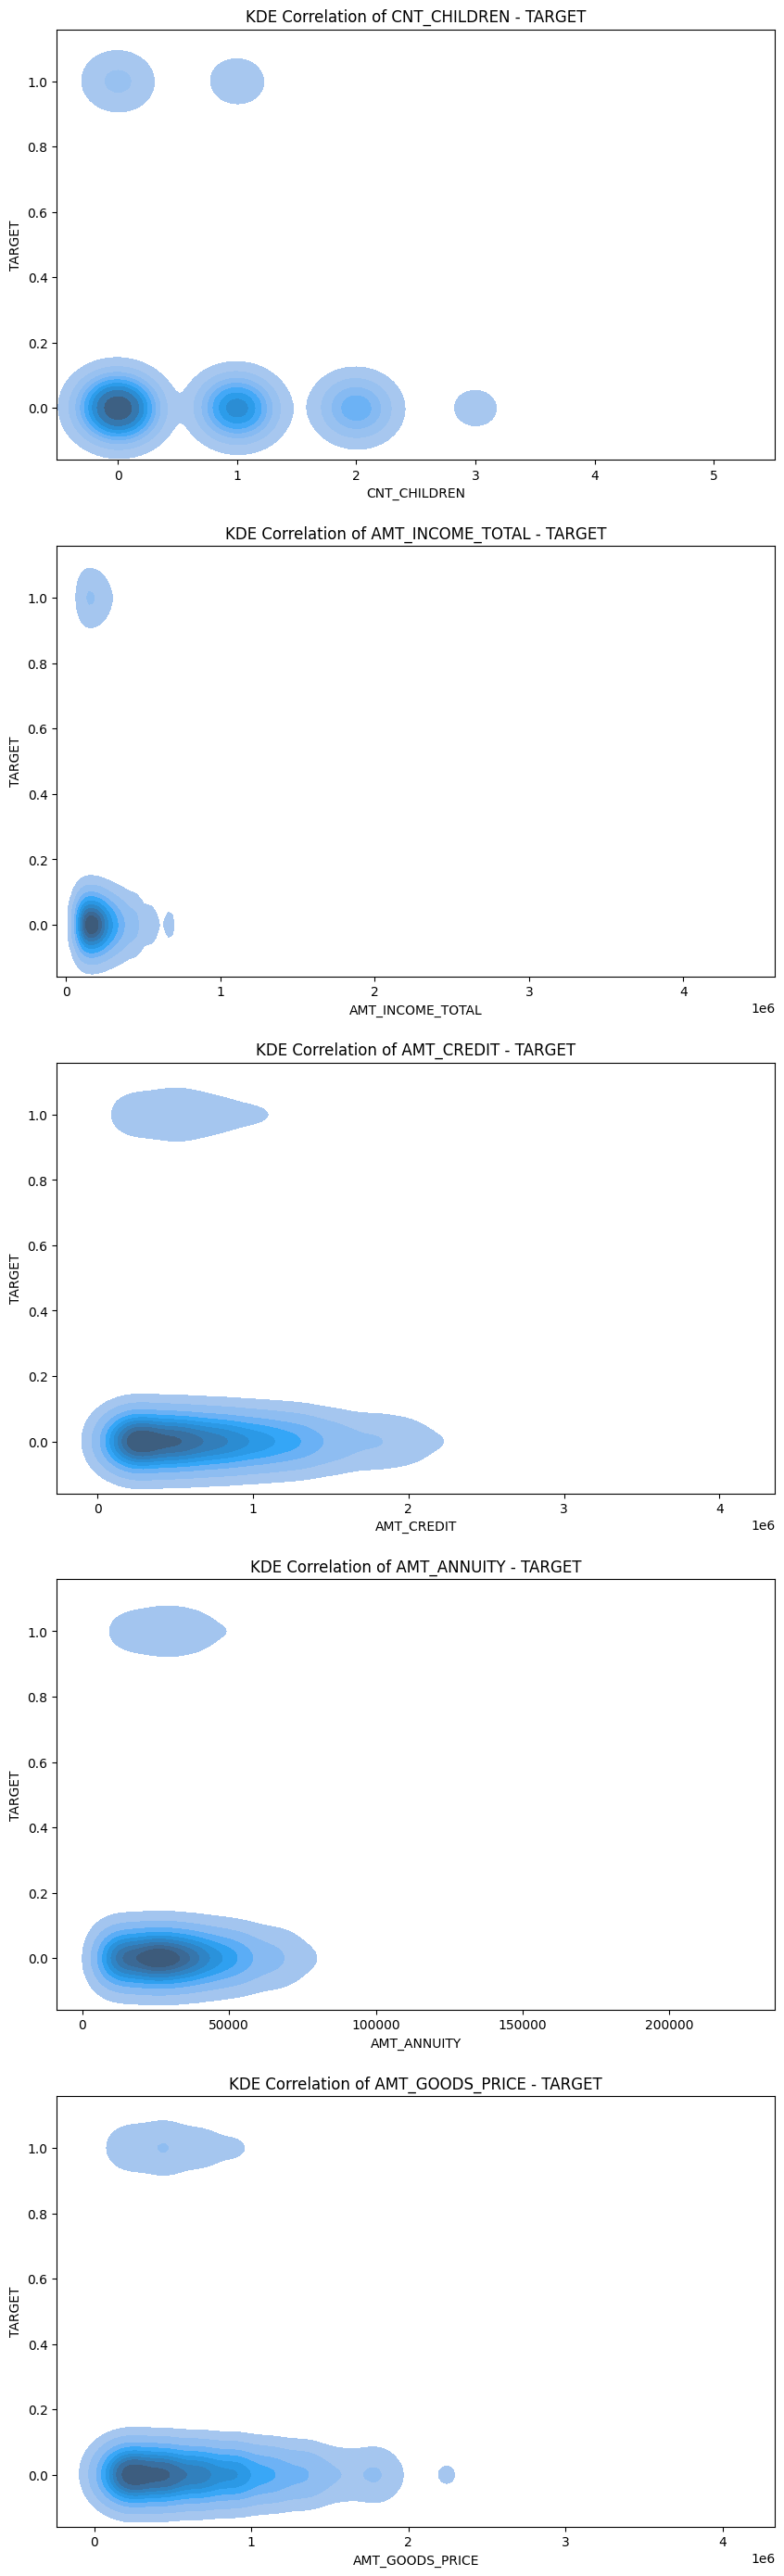

In [11]:
# We have two levels of correlation, above or below 0.05
good_corr_col = train_pcorr_no_target[0:5].index

fig, axes = plt.subplots(5, 1, figsize = (10, 35), sharey=True)

for i in range(0, len(good_corr_col)):
    sns.kdeplot(ax = axes[i], data = app_train_encoded, x = good_corr_col[i], y = "TARGET", fill = True)
    axes[i].set_title(f'KDE Correlation of {good_corr_col[i]} - TARGET')

## 8. Select the weakest correlations from step 6 and plot a heatmap with the target, along with KDE distributions, to observe the distribution differences between target==0 and 1.

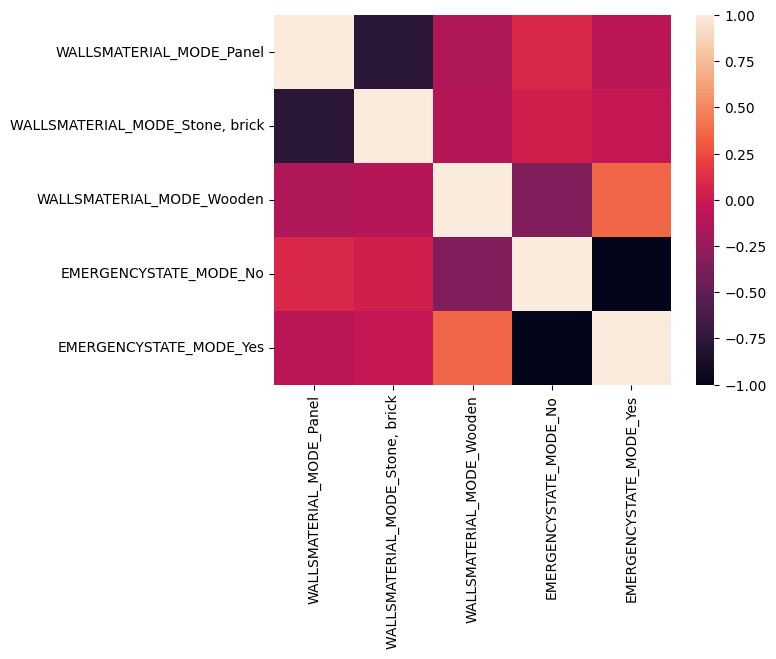

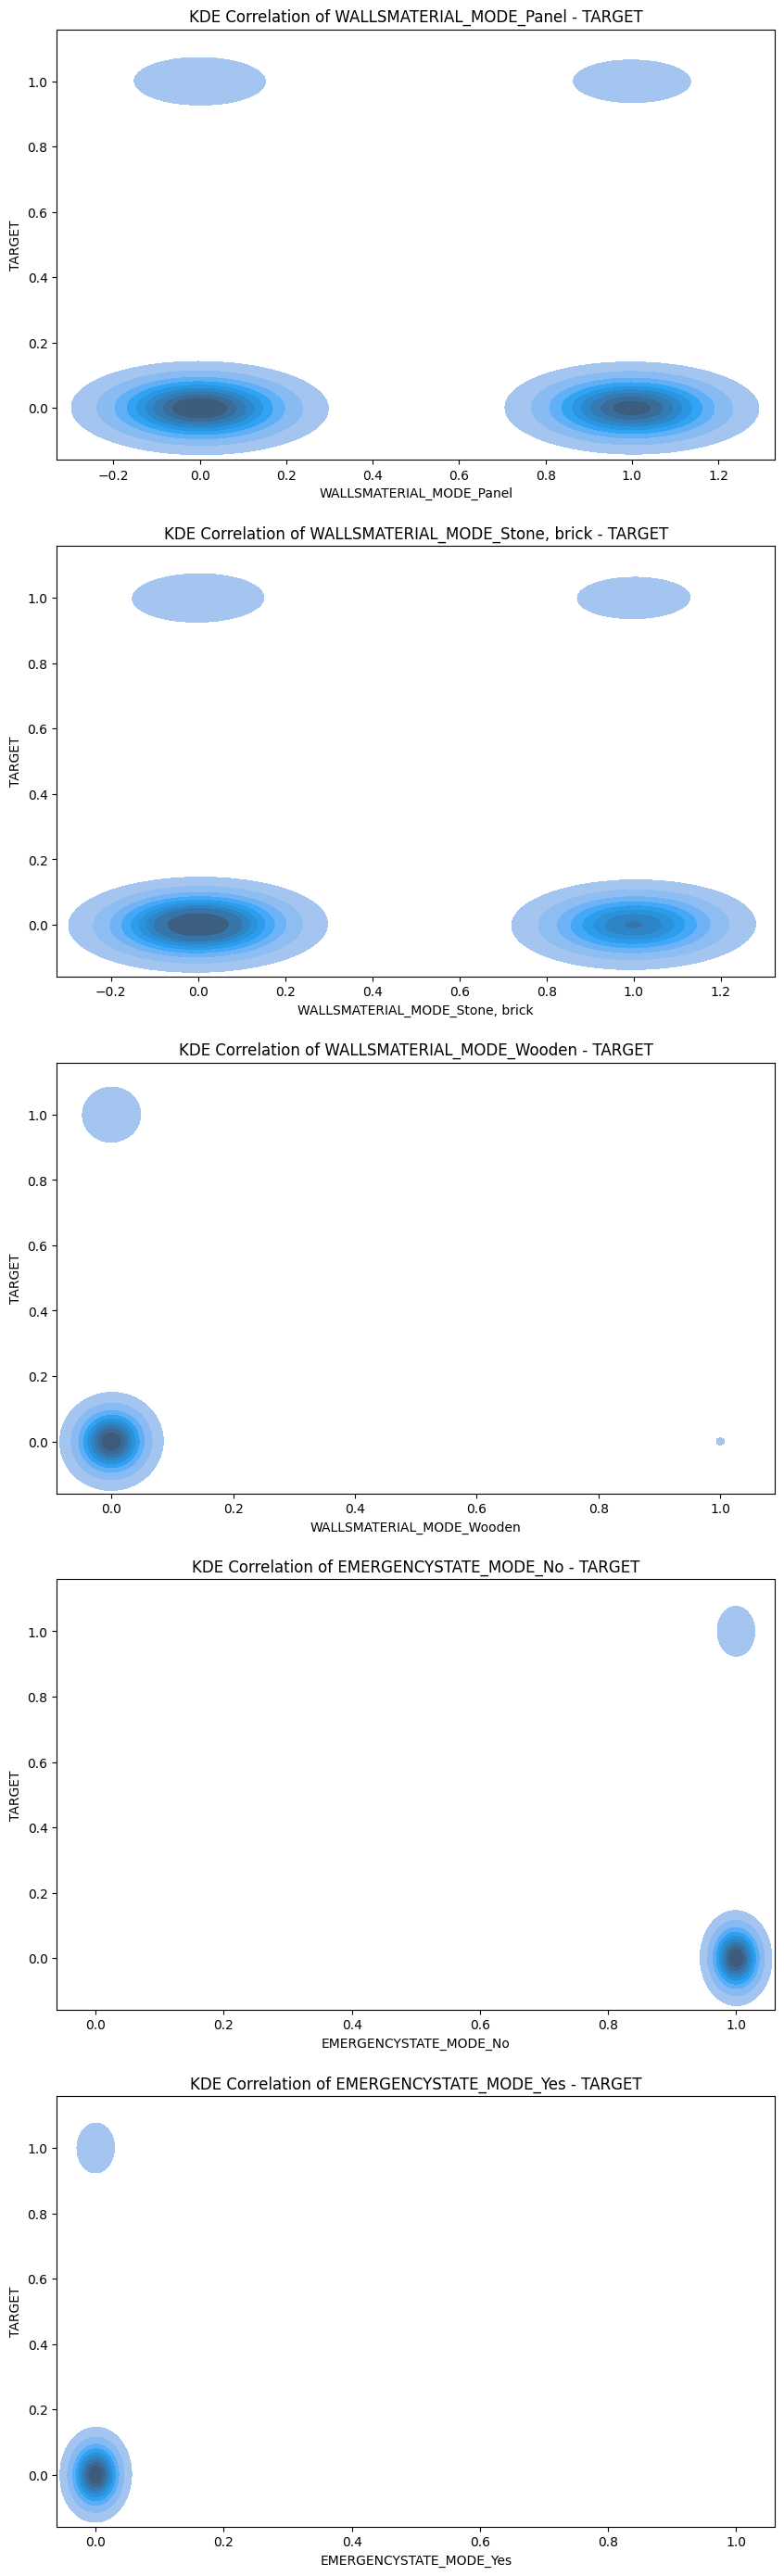

In [12]:
# Selection 5 weakest correlations
weak_corr_col = train_pcorr_no_target[-5:].index

# create heatmap data
heat = train_pcorr[weak_corr_col]
heat = heat.loc[weak_corr_col]

# draw heatmap
sns.heatmap(heat)

# correlation graph
fig, axes = plt.subplots(5, 1, figsize = (10, 35), sharey=True)

for i in range(0, len(weak_corr_col)):
    sns.kdeplot(ax = axes[i], data = app_train_encoded, 
                x = weak_corr_col[i], y = "TARGET", fill = True)
    axes[i].set_title(f'KDE Correlation of {weak_corr_col[i]} - TARGET')

## 9. Refer to Python for Data Science: Feature Engineering and use polynomial features to merge features with weak correlations, reducing feature dimensions.

## Use PCA for Dataset Dimensionality Reduction

In [13]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = app_train_encoded.drop(columns = ["TARGET"])
y = app_train_encoded['TARGET']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

# Calculate the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to keep for 25% variance explained
n_components = np.argmax(cumulative_variance_ratio >= 0.25) + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Find the most important feature names for training set
X_train_important = [np.abs(pca.components_[i]).argmax() for i in range(n_components)]
X_train_col_names = X_train.columns.values
X_train_pca_features = [X_train_col_names[X_train_important[i]] for i in range(n_components)]

# Find the most important feature names for testing set
X_test_important = [np.abs(pca.components_[i]).argmax() for i in range(n_components)]
X_test_col_names = X_test.columns.values
X_test_pca_features = [X_test_col_names[X_test_important[i]] for i in range(n_components)]

# turn X_train_pca and X_test_pca into dataframe
X_train_pca = pd.DataFrame(X_train_pca, columns = X_train_pca_features)
X_test_pca = pd.DataFrame(X_test_pca, columns = X_test_pca_features)

# Display the results
print("Original Training Data Shape:", X_train.shape)
print("Reduced Training Data Shape (PCA):", X_train_pca.shape)
print("Number of Components Selected:", n_components)

Original Training Data Shape: (6881, 233)
Reduced Training Data Shape (PCA): (6881, 16)
Number of Components Selected: 16


## Use LDA for Dataset Dimensionality Reduction

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification

# Load iris dataset as an example
X = app_train_encoded.drop(columns = ["TARGET"])
y = app_train_encoded['TARGET']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for LDA)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize LDA and fit on the training data
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)

# Calculate explained variance ratio for each component
explained_variance_ratio = lda.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the number of components that explain at least 75% of the variance
n_components = np.argmax(cumulative_explained_variance >= 0.15) + 1

# Transform both the training and test data to the selected number of components
X_train_lda_selected = lda.transform(X_train)[:, :n_components]
X_test_lda_selected = lda.transform(X_test)[:, :n_components]

# Print the number of components selected
print(f"Number of components selected: {n_components}")

Number of components selected: 1


## 10. Transform discrete features based on domain knowledge in the financial domain to further reduce feature dimensions. For example, percentage of loan amount relative to customer income, length of repayment period, ratio of employment length to customer age, etc.

In [15]:
# app_train_finance = app_train_encoded.copy()

# finance_features = ['AMT_CREDIT','AMT_INCOME_TOTAL','DAYS_EMPLOYED','DAYS_BIRTH']
# for i in range(0, len(finance_features)):
#     col_median = app_train_finance[finance_features[i]].median()
#     app_train_finance[finance_features[i]] = app_train_finance[finance_features[i]].fillna(col_median)

# # Create new features based on domain knowledge
# app_train_finance['LOAN_INCOME_RATIO'] = app_train_finance['AMT_CREDIT']/app_train_finance['AMT_INCOME_TOTAL']
# app_train_finance['REPAYMENT_TO_INCOME_RATIO'] = app_train_finance['AMT_ANNUITY']/app_train_finance['AMT_INCOME_TOTAL']
# app_train_finance['EMPLOYMENT_TO_AGE_RATIO'] = app_train_finance['DAYS_EMPLOYED']/app_train_finance['DAYS_BIRTH']
# # Add more custom features as needed

# # Drop original features if needed
# app_train_finance.drop(['AMT_CREDIT', 'DAYS_EMPLOYED', 'DAYS_BIRTH'], axis=1, inplace=True)

## Train Baseline PCA Model with Random Forest

Prediction Mean Accuracy:  0.9453805926786751
Baseline ROC AUC score: 0.6259268461729589


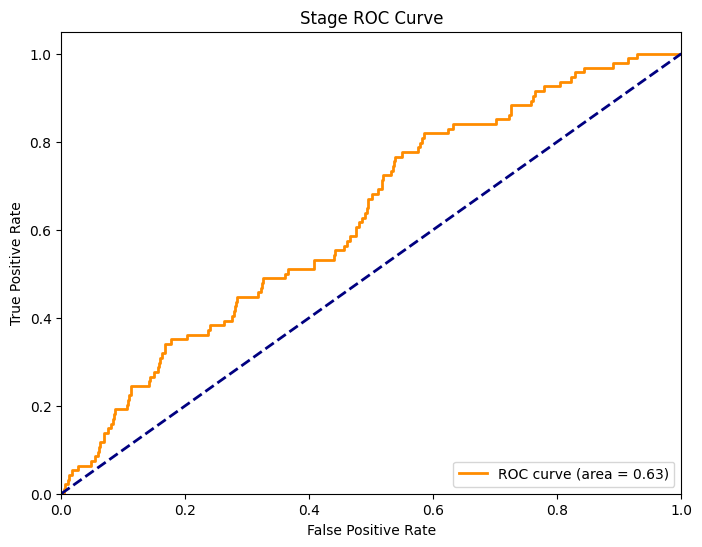

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# Initialize the Random Forest classifier
rf_pca = RandomForestClassifier(bootstrap = True, max_depth = 100, 
                                       random_state = 42, max_features = 2,
                                       min_samples_leaf = 2, min_samples_split= 10,
                                       n_estimators = 200)

# Train the classifier
rf_pca.fit(X_train_pca, y_train)

# Predict probabilities for test set
y_pred_proba_pca = rf_pca.predict_proba(X_test_pca)[:, 1]

# Calculate Prediction Accuracy
print("Prediction Mean Accuracy: ", rf_pca.score(X_test_pca, y_test))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba_pca)
print("Baseline ROC AUC score:", roc_auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pca)

# Calculate ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stage ROC Curve')
plt.legend(loc="lower right")
plt.show()

## 12. After training the baseline model, export the Feature Importances list, present it using a bar chart, analyze which features are more important for the task, and attempt to remove some low-importance features to get the results of Stage 1 testing.

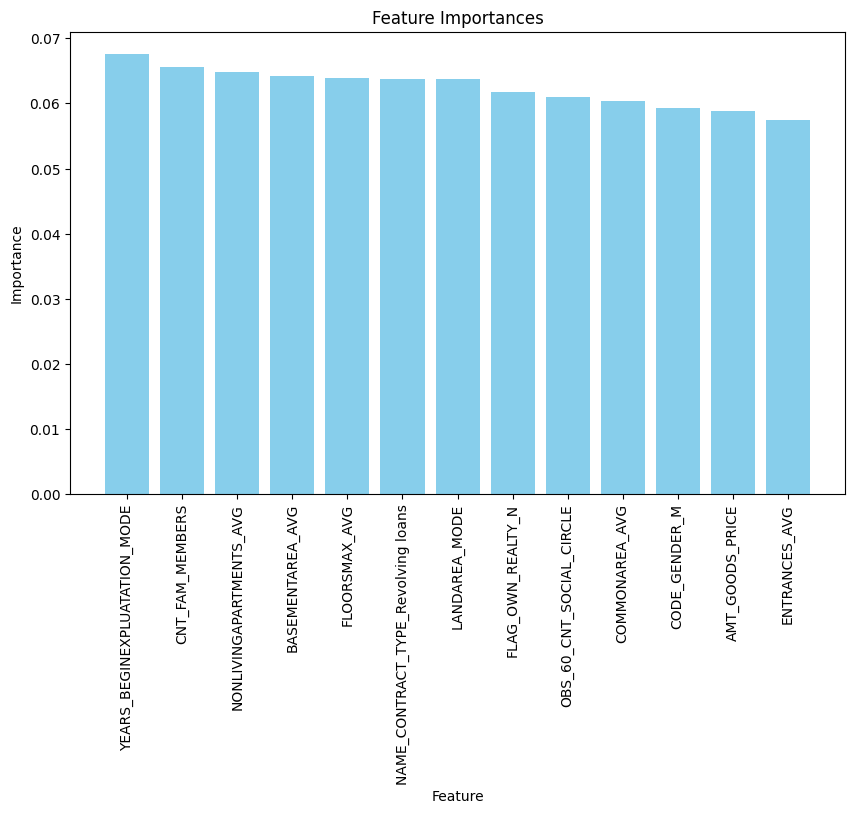

Low Importance Features to Remove:
['COMMONAREA_AVG', 'CODE_GENDER_M', 'AMT_GOODS_PRICE', 'ENTRANCES_AVG']


In [17]:
stage1_feature_importances = rf_pca.feature_importances_

# Create a DataFrame to store feature importances
stage1_importance_df = pd.DataFrame(data = stage1_feature_importances, 
                                    index = X_train_pca.columns.values, columns = ['Importance'])


# Sort features by importance
stage1_importance_df = stage1_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(stage1_importance_df.index, stage1_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()

# Remove low-importance features
# Adjust threshold as needed
stage1_low_importance_threshold = np.percentile(stage1_importance_df['Importance'], 25)  
stage1_low_importance_features = stage1_importance_df[stage1_importance_df['Importance'] < stage1_low_importance_threshold].index.to_list()
print("Low Importance Features to Remove:")
print(stage1_low_importance_features)

Prediction Mean Accuracy with Reduced Features:  0.9453805926786751
ROC AUC Score with Reduced Features: 0.6475172945899647


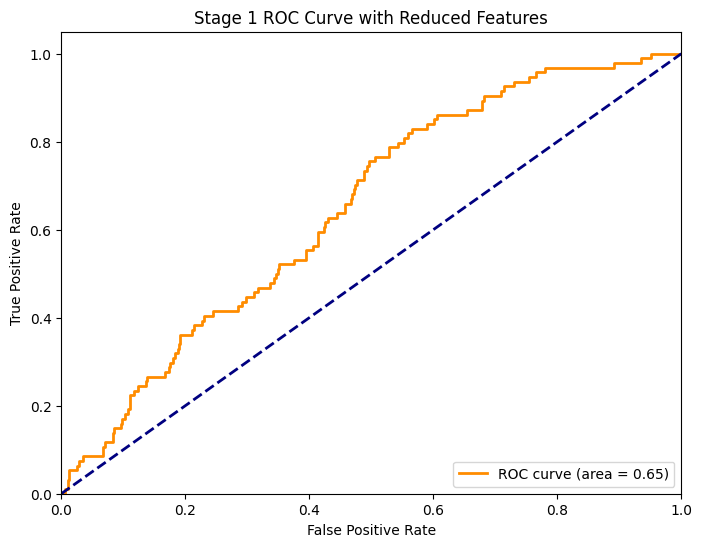

In [18]:
# Remove low-importance features from the dataset
X_train_pca_reduced = X_train_pca.drop(columns = stage1_low_importance_features)
X_test_pca_reduced = X_test_pca.drop(columns = stage1_low_importance_features)

# Retrain the model with reduced features
rf_pca_reduced = RandomForestClassifier(bootstrap = True, max_depth = 100, 
                                       random_state = 42, max_features = 2,
                                       min_samples_leaf = 2, min_samples_split= 10,
                                       n_estimators = 200)

# Train the classifier
rf_pca_reduced.fit(X_train_pca_reduced, y_train)

# Predict probabilities for test set
y_pred_proba_pca_reduced = rf_pca_reduced.predict_proba(X_test_pca_reduced)[:, 1]


# Calculate Prediction Accuracy
print("Prediction Mean Accuracy with Reduced Features: ", rf_pca_reduced.score(X_test_pca_reduced, y_test))

# Calculate ROC AUC score
roc_auc_reduced = roc_auc_score(y_test, y_pred_proba_pca_reduced)
print("ROC AUC Score with Reduced Features:", roc_auc_reduced)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pca_reduced)

# Calculate ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stage 1 ROC Curve with Reduced Features')
plt.legend(loc="lower right")
plt.show()

## Getting the model of low importance features removed

In [19]:
stage1_high_importance_threshold = np.percentile(stage1_importance_df['Importance'], 25)  
stage1_high_importance_df = stage1_importance_df[stage1_importance_df['Importance'] > stage1_high_importance_threshold]
stage1_high_importance_df

,Importance
YEARS_BEGINEXPLUATATION_MODE,0.067625
CNT_FAM_MEMBERS,0.065577
NONLIVINGAPARTMENTS_AVG,0.064837
BASEMENTAREA_AVG,0.064212
NONLIVINGAPARTMENTS_AVG,0.064075
FLOORSMAX_AVG,0.063971
NAME_CONTRACT_TYPE_Revolving loans,0.063768
LANDAREA_MODE,0.063754
BASEMENTAREA_AVG,0.063069
FLAG_OWN_REALTY_N,0.061731


## Train Baseline LDA Model with Random Forest

In [20]:
# # Initialize the Random Forest classifier
# rf_lda = RandomForestClassifier(bootstrap = True, max_depth = 100, 
#                                        random_state = 42, max_features = 2,
#                                        min_samples_leaf = 2, min_samples_split= 10,
#                                        n_estimators = 200)

# # Train the classifier
# rf_lda.fit(X_train_lda_selected, y_train)

# # Predict probabilities for test set
# y_pred_proba_lda = rf_lda.predict_proba(X_test_lda_selected)[:, 1]

# # Calculate Prediction Accuracy
# print("Prediction Mean Accuracy: ", rf_lda.score(X_test_lda_selected, y_test))

# # Calculate ROC AUC score
# roc_auc = roc_auc_score(y_test, y_pred_proba_lda)
# print("Baseline ROC AUC score:", roc_auc)

In [21]:
# # Calculate ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lda)

# # Calculate ROC AUC score
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()

# 13. Introduce other data for training, starting with bureau and bureau_balance.

# 14. Group bureau by SK_ID_CURR , perform statistical operations, and merge the data into application.csv . Use counts, sums, means, etc., according to financial knowledge, and assign NaN values when there is no corresponding SK_ID_CURR . Convert categorical data in CREDIT_TYPE to counts of different categories.

# 15. Repeat step 14 for bureau_balance.csv and merge it into application.

## Stage 2 (Bureau and Bureau Balance)

In [22]:
# # deal with bureau first, convert categorical data into distinct int
# bureau = pd.read_csv('/kaggle/input/credit-risk/bureau.csv')
# bureau_bal = pd.read_csv('/kaggle/input/credit-risk/bureau_balance.csv')
# bureau['CREDIT_ACTIVE'] = bureau['CREDIT_ACTIVE'].astype('category')
# bureau['CREDIT_ACTIVE'] = pd.factorize(bureau['CREDIT_ACTIVE'])[0]
# bureau['CREDIT_CURRENCY'] = bureau['CREDIT_CURRENCY'].astype('category')
# bureau['CREDIT_CURRENCY'] = pd.factorize(bureau['CREDIT_CURRENCY'])[0]
# bureau['CREDIT_TYPE'] = bureau['CREDIT_TYPE'].astype('category')
# bureau['CREDIT_TYPE'] = pd.factorize(bureau['CREDIT_TYPE'])[0]

# # fill none value with the mean for each SK_ID_CURR group in bureau
# bureau_null_col = bureau.columns[bureau.isnull().any()]
# for i in range(len(bureau_null_col)):
#     full_col = bureau.groupby(["SK_ID_CURR"])[bureau_null_col[i]].apply(lambda x:x.fillna(x.mean()))
#     bureau[bureau_null_col[i]] = full_col.reset_index(level=0, drop=True)
    
# # double check, there's still none value
# bureau.describe(include = 'all')

# # do the same for bureau balance again
# bureau_bal['STATUS'] = bureau_bal['STATUS'].astype('category')
# bureau_bal['STATUS'] = pd.factorize(bureau_bal['STATUS'])[0]

# # now merge the bureau with bureau balance
# bureau_merge = pd.merge(bureau, bureau_bal, on='SK_ID_BUREAU', how='left')

# # fill none value with the mean of 'Month Balance' and 'Status' for each SK_ID_CURR group in merge
# bal_col = ['MONTHS_BALANCE', 'STATUS']
# for i in range(len(bal_col)):
#     full_col = bureau_merge.groupby(["SK_ID_CURR"])[bal_col[i]].apply(lambda x:x.fillna(x.mean()))
#     bureau_merge[bal_col[i]] = full_col.reset_index(level=0, drop=True)
    
# # group rows of merge with 'SK_ID_CURR'
# bureau_merge = bureau_merge.fillna(0)
# bureau_group = bureau_merge.groupby('SK_ID_CURR').agg({
#     'CREDIT_ACTIVE': lambda x: x.value_counts().index[0],
#     'CREDIT_CURRENCY': lambda x: x.value_counts().index[0],
#     'CREDIT_TYPE': lambda x: x.value_counts().index[0],
#     'DAYS_CREDIT': 'mean',
#     'CREDIT_DAY_OVERDUE': 'mean',
#     'DAYS_CREDIT_ENDDATE':'mean',
#     'DAYS_ENDDATE_FACT':'mean',
    
#     'CNT_CREDIT_PROLONG':'mean',
#     'AMT_CREDIT_SUM_DEBT':'mean',
#     'AMT_CREDIT_SUM_LIMIT':'mean',
#     'AMT_CREDIT_SUM_OVERDUE':'mean',
#     'AMT_CREDIT_MAX_OVERDUE':'mean',
#     'AMT_CREDIT_SUM':'mean',
    
#     'DAYS_CREDIT_UPDATE':'mean',
#     'AMT_ANNUITY':'mean',
#     'MONTHS_BALANCE':'mean',
#     'STATUS': lambda x: x.value_counts().index[0]
# })

# bureau_group = bureau_group.reset_index()
# bureau_group.to_csv(r"kaggle\output\bureau_group.csv")
# stage2 = pd.merge(train, bureau_group, on='SK_ID_CURR', how='left')
# stage2.to_csv(r"kaggle\output\app_train_stage2.csv")

## 16. Repeat steps 6-9 for some strongly correlated columns in the newly merged data.


In [23]:
bureau_group = pd.read_csv('/kaggle/input/test-stage/bureau_group.csv')
bureau_group = bureau_group.loc[:, 'SK_ID_CURR':]

duplicate_col = []
for col in bureau_group.columns.values:
    if col in train.columns.values:
        duplicate_col.append(col)   
duplicate_col = duplicate_col[1:]

bureau_group = bureau_group.drop(columns = duplicate_col)

stage2 = pd.merge(train, bureau_group, on='SK_ID_CURR', how='left')
stage2_encoded = stage2.dropna()
stage2_encoded = stage2_encoded.drop(columns = ['SK_ID_CURR'])

stage2_encoded_cate_col = stage2_encoded.select_dtypes(include=['object']).columns.tolist()

# train set One Hot encoding use the categorical variable list
stage2_encoded = pd.get_dummies(stage2_encoded, columns = stage2_encoded_cate_col).astype(int)
stage2_encoded

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
71,0,0,103500,573628,24435,463500,0,-15406,-892,-341,...,0,0,0,0,0,0,1,0,1,0
124,0,1,202500,260725,16789,198000,0,-16282,-4375,-762,...,0,0,0,0,0,1,0,0,1,0
152,0,0,202500,675000,53329,675000,0,-11375,-2311,-180,...,0,0,0,1,0,0,0,0,1,0
161,0,0,162000,263686,24781,238500,0,-13972,-4472,-464,...,0,0,0,0,0,1,0,0,1,0
255,1,1,225000,1019205,31032,774000,0,-11356,-602,-335,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,0,2,112500,361462,16051,274500,0,-15006,-1105,-1806,...,0,0,0,0,0,0,1,0,1,0
307359,0,1,99000,675000,21906,675000,0,-14007,-2021,-2395,...,0,0,0,0,0,1,0,0,1,0
307407,1,1,261000,711454,47673,643500,0,-11407,-1641,-9288,...,0,0,0,0,0,1,0,0,1,0
307456,0,0,94500,270000,15075,270000,0,-20246,-5452,-5480,...,0,0,0,0,0,0,1,0,1,0


In [24]:
# Step 6. Use Pearson Correlation Coefficient to check correlation betwen each data columns and the target column
# Value of 1.0 is the correlation to the column itself, drop it, the number of column will be 235 - 1 = 234
stage2_pcorr = stage2_encoded.corr(method = 'pearson')
stage2_pcorr_no_target = stage2_pcorr['TARGET'].drop(index = ['TARGET'])
stage2_pcorr_no_target = abs(stage2_pcorr_no_target)

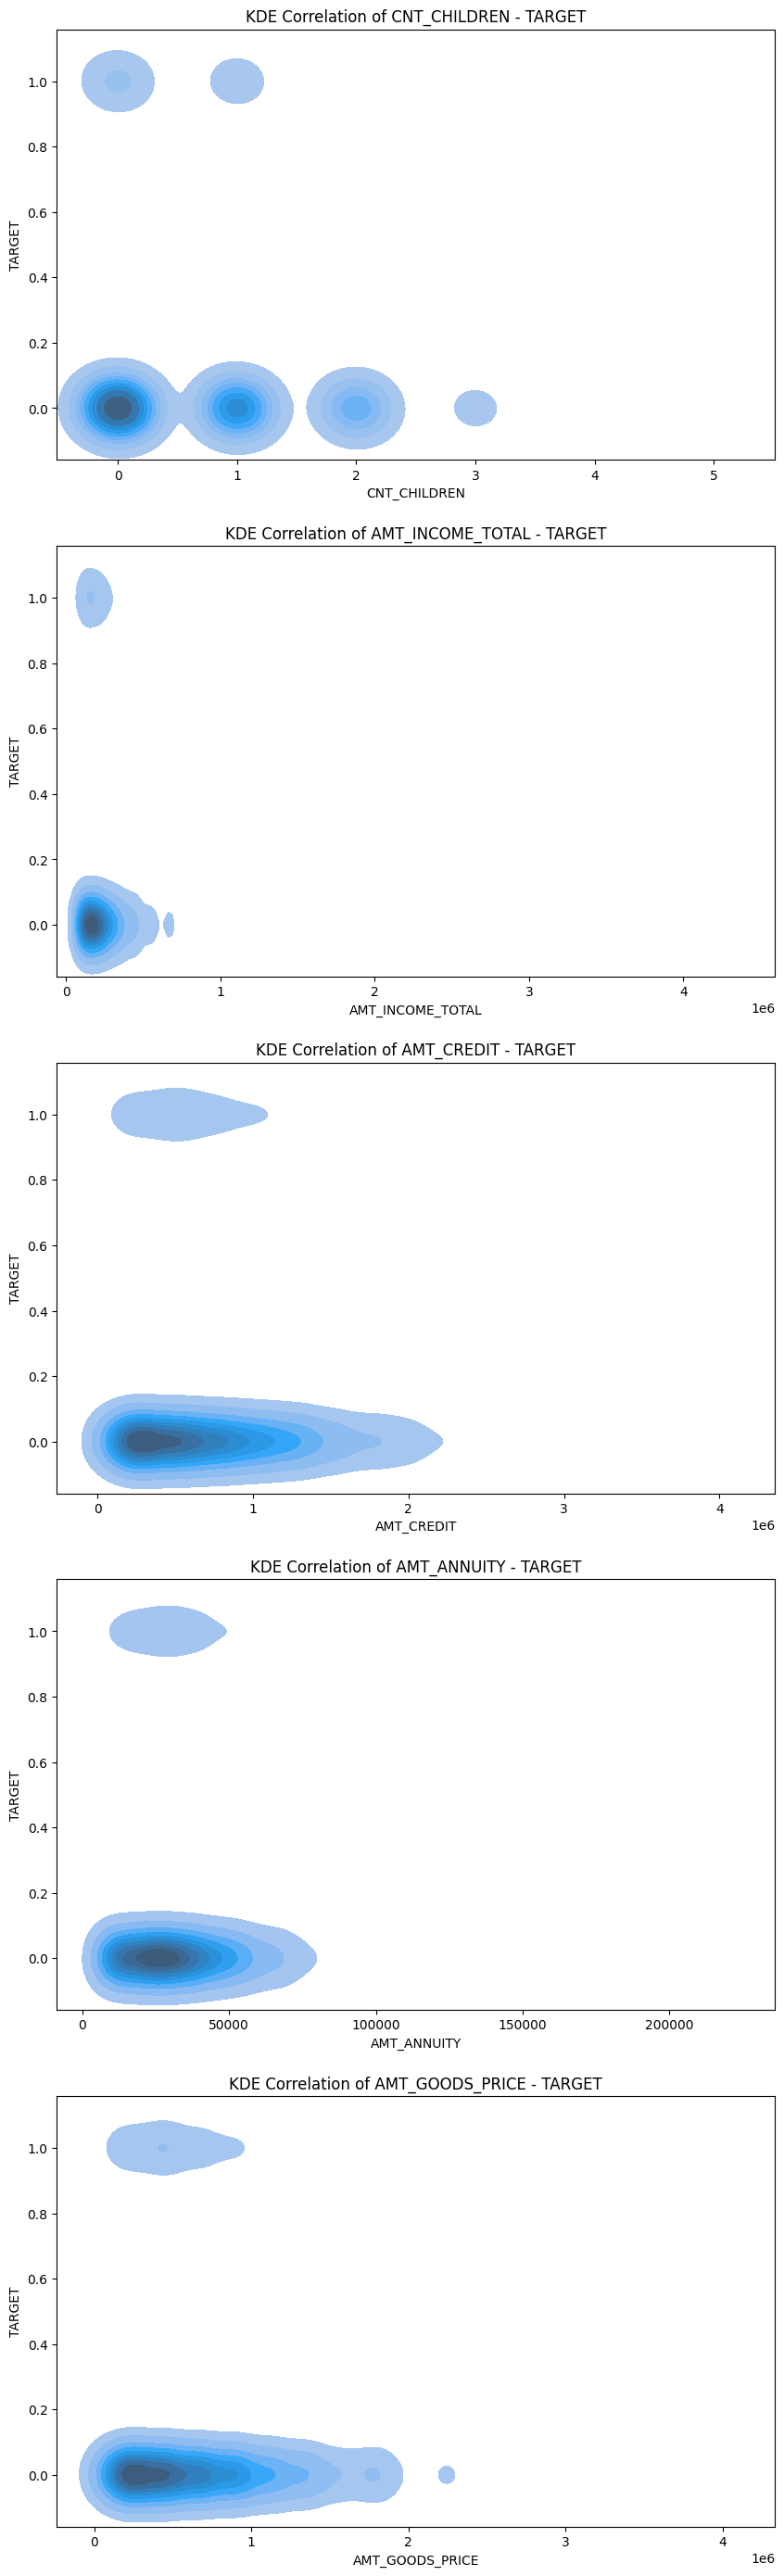

In [25]:
# Step 7. We have two levels of correlation, above or below 0.05
stage2_good_corr_col = stage2_pcorr_no_target[0:5].index

fig, axes = plt.subplots(5, 1, figsize = (10, 35), sharey=True)

for i in range(0, len(stage2_good_corr_col)):
    sns.kdeplot(ax = axes[i], data = stage2_encoded, x = stage2_good_corr_col[i], y = "TARGET", fill = True)
    axes[i].set_title(f'KDE Correlation of {stage2_good_corr_col[i]} - TARGET')

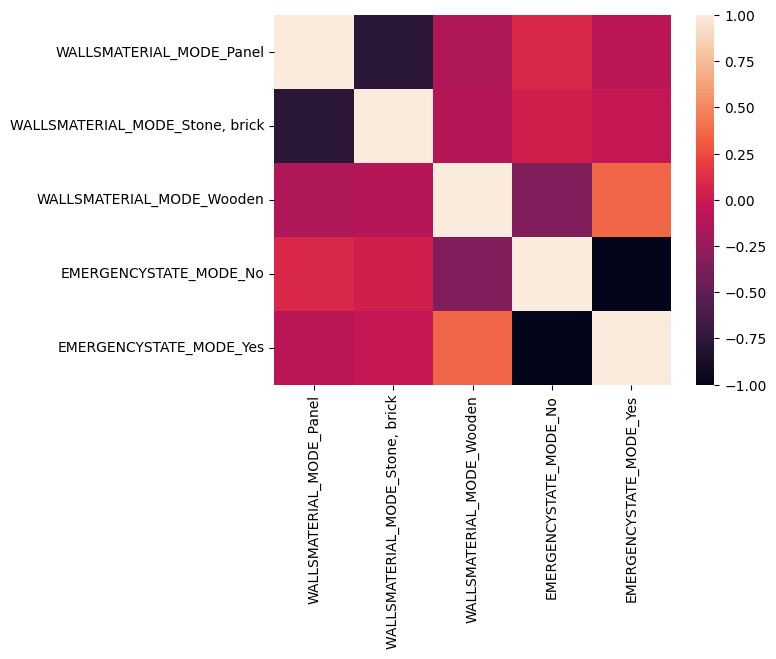

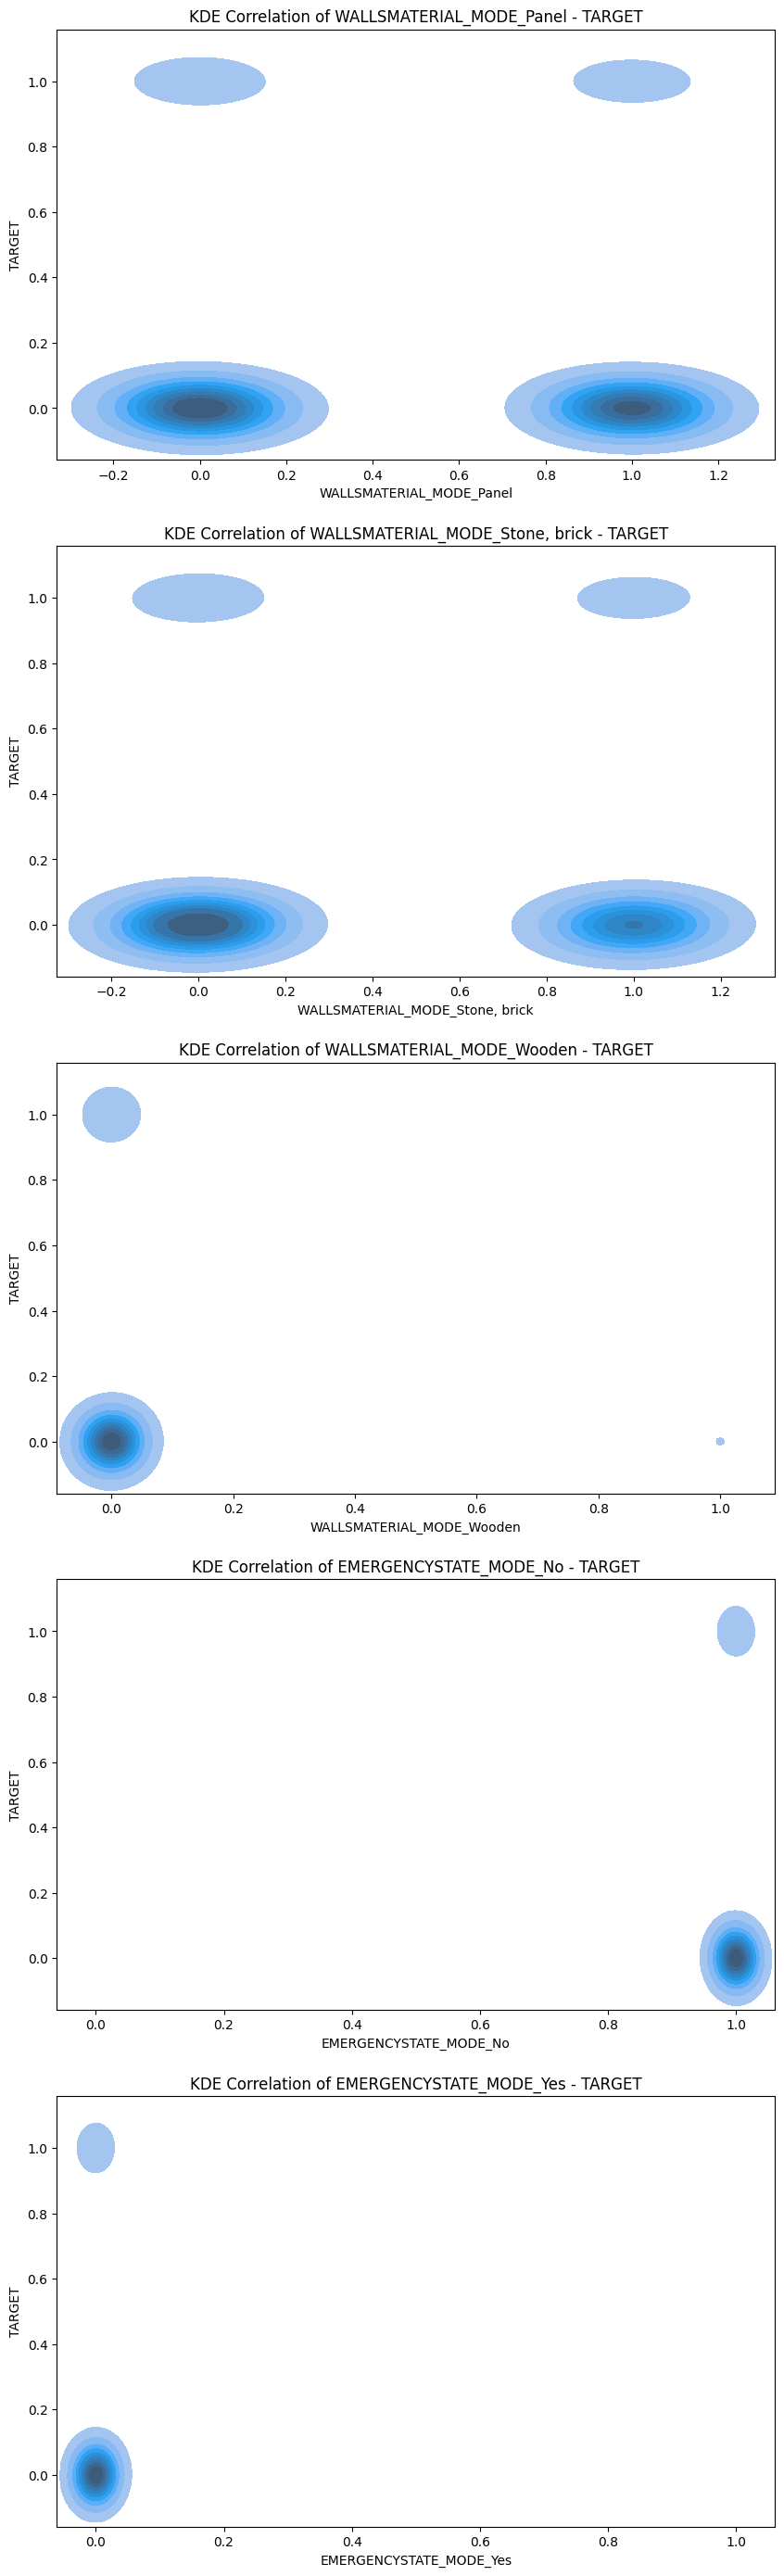

In [26]:
# Step 8. Selection 5 weakest correlations
stage2_weak_corr_col = stage2_pcorr_no_target[-5:].index

# create heatmap data
stage2_heat = stage2_pcorr[stage2_weak_corr_col]
stage2_heat = stage2_heat.loc[stage2_weak_corr_col]

# draw heatmap
sns.heatmap(stage2_heat)

# correlation graph
fig, axes = plt.subplots(5, 1, figsize = (10, 35), sharey=True)

for i in range(0, len(stage2_weak_corr_col)):
    sns.kdeplot(ax = axes[i], data = stage2_encoded, 
                x = stage2_weak_corr_col[i], y = "TARGET", fill = True)
    axes[i].set_title(f'KDE Correlation of {stage2_weak_corr_col[i]} - TARGET')

## 17. Check if there are too many missing columns in the merged application data, which would be meaningless for training, and drop them.

In [27]:
# missing_values = ab_encoded.isnull().sum()

# # Calculate percentage of missing values for each column
# percentage_missing = (missing_values / ab_encoded.shape[0]) * 100

# # Define threshold for percentage of missing values
# threshold = 20  # Adjust as needed

# # Find columns with missing values exceeding the threshold
# columns_to_drop = percentage_missing[percentage_missing > threshold].index.tolist()

# # Drop columns with too many missing values
# cleaned_data = ab_encoded.drop(columns=columns_to_drop)
# cleaned_data

## Use PCA for Dimensionality Reduction 

In [28]:
X = stage2_encoded.drop(columns = ["TARGET"])
y = stage2_encoded['TARGET']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns) 
X_test_std = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

# Calculate the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to keep for 25% variance explained
n_components = np.argmax(cumulative_variance_ratio >= 0.25) + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Find the most important feature names for training set
X_train_important = [np.abs(pca.components_[i]).argmax() for i in range(n_components)]
X_train_col_names = X_train.columns.values
X_train_pca_features = [X_train_col_names[X_train_important[i]] for i in range(n_components)]

# Find the most important feature names for testing set
X_test_important = [np.abs(pca.components_[i]).argmax() for i in range(n_components)]
X_test_col_names = X_test.columns.values
X_test_pca_features = [X_test_col_names[X_test_important[i]] for i in range(n_components)]

# turn X_train_pca and X_test_pca into dataframe
X_train_pca = pd.DataFrame(X_train_pca, columns = X_train_pca_features)
X_test_pca = pd.DataFrame(X_test_pca, columns = X_test_pca_features)

# Display the results
print("Original Training Data Shape:", X_train.shape)
print("Reduced Training Data Shape (PCA):", X_train_pca.shape)
print("Number of Components Selected:", n_components)

Original Training Data Shape: (6863, 249)
Reduced Training Data Shape (PCA): (6863, 17)
Number of Components Selected: 17


## 18. Train Random Forest again, export Feature Importances, delete low-importance Features, and get the results of Stage 2 testing.

Prediction Mean Accuracy:  0.9382284382284383
Baseline ROC AUC score: 0.6079221844603305


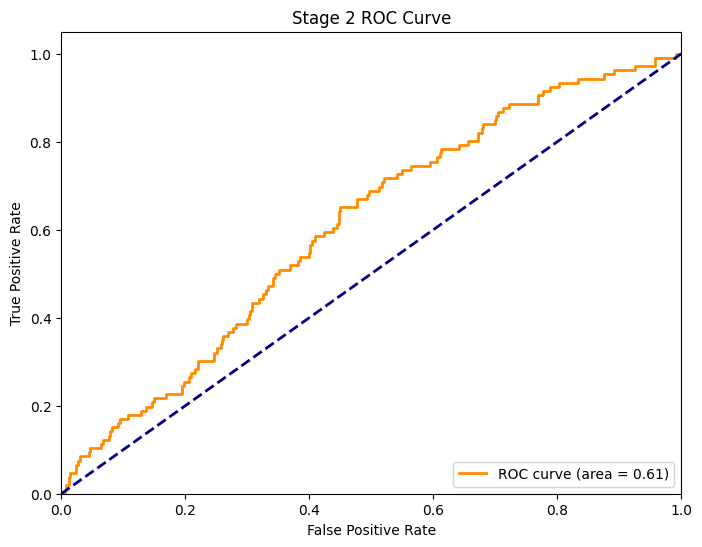

In [29]:
# Initialize the Random Forest classifier
rf_pca = RandomForestClassifier(bootstrap = True, max_depth = 100, 
                                       random_state = 42, max_features = 2,
                                       min_samples_leaf = 2, min_samples_split= 10,
                                       n_estimators = 200)

# Train the classifier
rf_pca.fit(X_train_pca, y_train)

# Predict probabilities for test set
y_pred_proba_pca = rf_pca.predict_proba(X_test_pca)[:, 1]

# Calculate Prediction Accuracy
print("Prediction Mean Accuracy: ", rf_pca.score(X_test_pca, y_test))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba_pca)
print("Baseline ROC AUC score:", roc_auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pca)

# Calculate ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stage 2 ROC Curve')
plt.legend(loc="lower right")
plt.show()

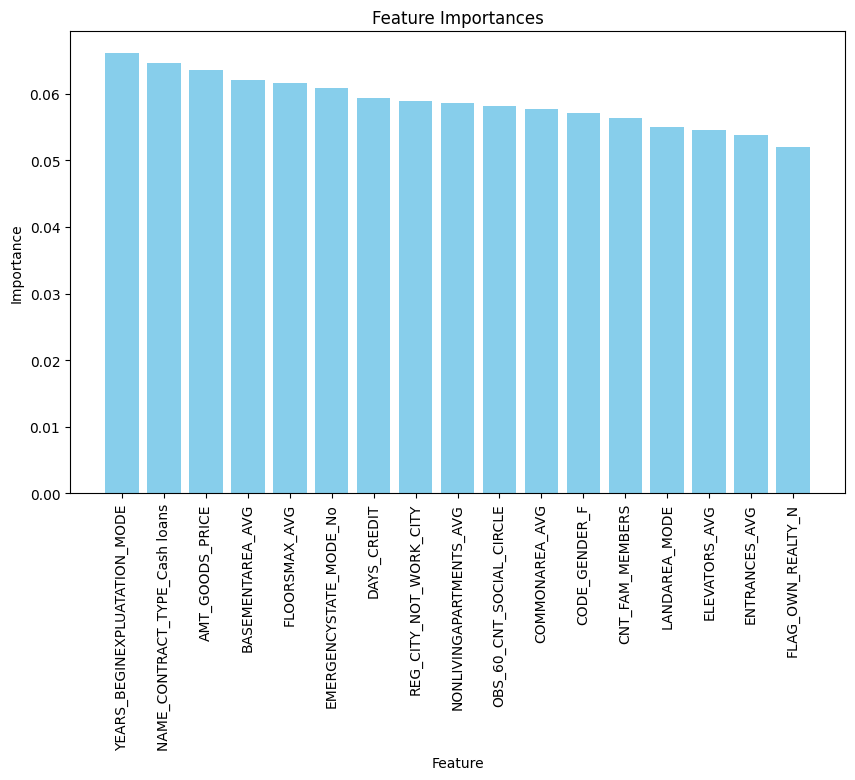

Low Importance Features to Remove:
['LANDAREA_MODE', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLAG_OWN_REALTY_N']


In [30]:
stage2_feature_importances = rf_pca.feature_importances_

# Create a DataFrame to store feature importances
stage2_importance_df = pd.DataFrame(data = stage2_feature_importances, 
                                    index = X_train_pca.columns.values, columns = ['Importance'])


# Sort features by importance
stage2_importance_df = stage2_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(stage2_importance_df.index, stage2_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()

# Remove low-importance features
# Adjust threshold as needed
stage2_low_importance_threshold = np.percentile(stage2_importance_df['Importance'], 25)  
stage2_low_importance_features = stage2_importance_df[stage2_importance_df['Importance'] < stage2_low_importance_threshold].index.to_list()
print("Low Importance Features to Remove:")
print(stage2_low_importance_features)

Prediction Mean Accuracy with Reduced Features:  0.9382284382284383
ROC AUC Score with Reduced Features: 0.5820578928864409


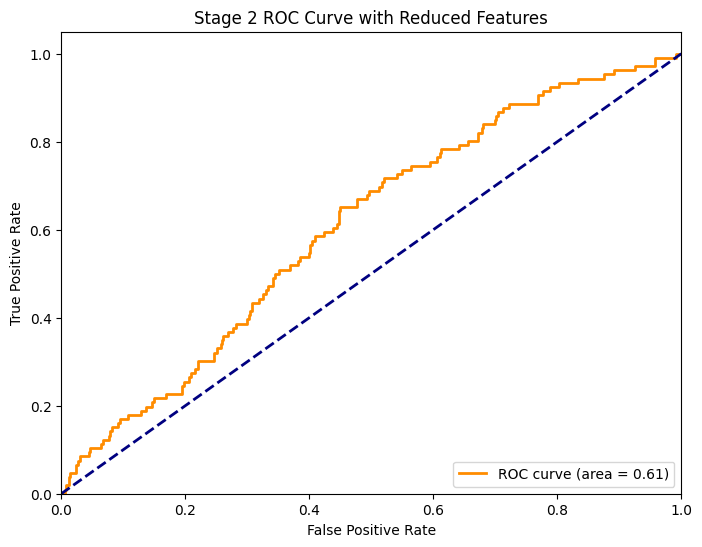

In [31]:
# Remove low-importance features from the dataset
X_train_pca_reduced = X_train_pca.drop(columns = stage2_low_importance_features)
X_test_pca_reduced = X_test_pca.drop(columns = stage2_low_importance_features)

# Retrain the model with reduced features
rf_pca_reduced = RandomForestClassifier(bootstrap = True, max_depth = 100, 
                                       random_state = 42, max_features = 2,
                                       min_samples_leaf = 2, min_samples_split= 10,
                                       n_estimators = 200)

# Train the classifier
rf_pca_reduced.fit(X_train_pca_reduced, y_train)

# Predict probabilities for test set
y_pred_proba_pca_reduced = rf_pca_reduced.predict_proba(X_test_pca_reduced)[:, 1]


# Calculate Prediction Accuracy
print("Prediction Mean Accuracy with Reduced Features: ", rf_pca_reduced.score(X_test_pca_reduced, y_test))

# Calculate ROC AUC score
roc_auc_reduced = roc_auc_score(y_test, y_pred_proba_pca_reduced)
print("ROC AUC Score with Reduced Features:", roc_auc_reduced)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pca)

# Calculate ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stage 2 ROC Curve with Reduced Features')
plt.legend(loc="lower right")
plt.show()

In [32]:
stage2_high_importance_threshold = np.percentile(stage2_importance_df['Importance'], 25)  
stage2_high_importance_df = stage2_importance_df[stage2_importance_df['Importance'] > stage2_high_importance_threshold]
stage2_high_importance_df

,Importance
YEARS_BEGINEXPLUATATION_MODE,0.066023
NAME_CONTRACT_TYPE_Cash loans,0.064597
AMT_GOODS_PRICE,0.063565
BASEMENTAREA_AVG,0.062089
FLOORSMAX_AVG,0.061518
EMERGENCYSTATE_MODE_No,0.060839
DAYS_CREDIT,0.059381
REG_CITY_NOT_WORK_CITY,0.058909
NONLIVINGAPARTMENTS_AVG,0.058537
OBS_60_CNT_SOCIAL_CIRCLE,0.058066


## 19. Repeat steps 13-18, gradually introduce other data for training. There are 4 more CSV files, so you can get scores for Stages 3, 4, 5, and 6.

## Stage 3 (Credit Card Balance)

In [33]:
# stage2 = pd.read_csv('/kaggle/input/stage-2-6-dataset/app_train_stage2.csv')
# stage2 = stage2.drop(stage2.columns[0], axis = 1)

# # fill none value with the mean for each SK_ID_CURR group in credit
# credit = pd.read_csv('/kaggle/input/credit-risk/credit_card_balance.csv')
# credit.describe(include = 'all')
# credit_null_col = credit.columns[credit.isnull().any()]
# for i in range(len(credit_null_col)):
#     full_col = credit.groupby(["SK_ID_CURR"])[credit_null_col[i]].apply(lambda x:x.fillna(x.mean()))
#     credit[credit_null_col[i]] = full_col.reset_index(level=0, drop=True)

# credit = credit.dropna()
# credit['NAME_CONTRACT_STATUS'] = credit['NAME_CONTRACT_STATUS'].astype('category')
# credit['NAME_CONTRACT_STATUS'] = pd.factorize(credit['NAME_CONTRACT_STATUS'])[0]

# credit_group = credit.groupby('SK_ID_CURR').agg({
#     'MONTHS_BALANCE': 'mean',
#     'AMT_BALANCE': 'mean',
#     'AMT_CREDIT_LIMIT_ACTUAL':'mean',
#     'AMT_DRAWINGS_ATM_CURRENT':'mean',
#     'AMT_DRAWINGS_CURRENT': 'mean',
#     'AMT_DRAWINGS_OTHER_CURRENT': 'mean',
#     'AMT_DRAWINGS_POS_CURRENT': 'mean',
#     'AMT_INST_MIN_REGULARITY': 'mean',
#     'AMT_PAYMENT_CURRENT': 'mean',
#     'AMT_PAYMENT_TOTAL_CURRENT': 'mean',
#     'AMT_RECEIVABLE_PRINCIPAL': 'mean',
#     'AMT_RECIVABLE': 'mean',
#     'AMT_TOTAL_RECEIVABLE': 'mean',
#     'CNT_DRAWINGS_ATM_CURRENT': lambda x: x.value_counts().index[0],
#     'CNT_DRAWINGS_CURRENT': lambda x: x.value_counts().index[0],
#     'CNT_DRAWINGS_OTHER_CURRENT': lambda x: x.value_counts().index[0],
#     'CNT_DRAWINGS_POS_CURRENT': lambda x: x.value_counts().index[0],
#     'CNT_INSTALMENT_MATURE_CUM': 'mean',
#     'NAME_CONTRACT_STATUS': lambda x: x.value_counts().index[0],
#     'SK_DPD': lambda x: x.value_counts().index[0],
#     'SK_DPD_DEF': lambda x: x.value_counts().index[0]
# })

# credit_group = credit_group.reset_index()
# credit_group.to_csv('r"kaggle\output\credit_group.csv')
# app_train_stage3 = pd.merge(stage2, credit_group, on='SK_ID_CURR', how='left')
# app_train_stage3.to_csv(r"kaggle\output\app_train_stage3.csv")

In [34]:
# import stage3 csv
credit_group = pd.read_csv('/kaggle/input/test-stage/credit_group.csv')
credit_group = credit_group.loc[:, 'SK_ID_CURR':]

duplicate_col = []
for col in credit_group.columns.values:
    if col in train.columns.values:
        duplicate_col.append(col)  
duplicate_col = duplicate_col[1:]

credit_group = credit_group.drop(columns = duplicate_col)

stage3 = pd.merge(stage2, credit_group, on='SK_ID_CURR', how='left')
stage3_encoded = stage3.dropna()
stage3_encoded = stage3_encoded.loc[:, 'SK_ID_CURR':]
stage3_encoded = stage3_encoded.drop(columns = ['SK_ID_CURR'])

stage3_cate_col = stage3_encoded.select_dtypes(include=['object']).columns.tolist()

# train set One Hot encoding use the categorical variable list
stage3_encoded = pd.get_dummies(stage3_encoded, columns = stage3_cate_col).astype(int)
stage3_encoded

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
124,0,1,202500,260725,16789,198000,0,-16282,-4375,-762,...,0,0,0,0,0,1,0,0,1,0
343,0,0,225000,888840,32053,675000,0,-16719,-687,-8892,...,0,0,0,0,0,0,1,0,1,0
803,0,3,112500,832500,24471,832500,0,-13765,-1806,-8001,...,0,0,0,0,0,0,1,0,1,0
917,0,0,225000,454500,46570,454500,0,-12229,-4078,-90,...,0,0,0,0,0,1,0,0,1,0
1047,0,0,135000,518562,22099,463500,0,-17964,-169,-9735,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306013,0,1,202500,281938,21946,252000,0,-11514,-266,-5837,...,0,0,0,0,0,0,1,0,1,0
306168,0,1,360000,1051294,34042,918000,0,-11380,-74,-87,...,0,0,0,0,0,0,1,0,1,0
306602,0,1,135000,270000,25897,270000,0,-9768,-1483,-2135,...,0,0,0,0,0,1,0,0,1,0
306814,0,0,135000,993082,47776,913500,0,-19092,-5273,-9285,...,0,0,0,0,0,0,1,0,1,0


## Use PCA for Stage 3 Dimensionality Reduction 

In [35]:
X = stage3_encoded.drop(columns = ["TARGET"])
y = stage3_encoded['TARGET']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

# Calculate the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to keep for 25% variance explained
n_components = np.argmax(cumulative_variance_ratio >= 0.25) + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Find the most important feature names for training set
X_train_important = [np.abs(pca.components_[i]).argmax() for i in range(n_components)]
X_train_col_names = X_train.columns.values
X_train_pca_features = [X_train_col_names[X_train_important[i]] for i in range(n_components)]

# Find the most important feature names for testing set
X_test_important = [np.abs(pca.components_[i]).argmax() for i in range(n_components)]
X_test_col_names = X_test.columns.values
X_test_pca_features = [X_test_col_names[X_test_important[i]] for i in range(n_components)]

# turn X_train_pca and X_test_pca into dataframe
X_train_pca = pd.DataFrame(X_train_pca, columns = X_train_pca_features)
X_test_pca = pd.DataFrame(X_test_pca, columns = X_test_pca_features)

# Display the results
print("Original Training Data Shape:", X_train.shape)
print("Reduced Training Data Shape (PCA):", X_train_pca.shape)
print("Number of Components Selected:", n_components)

Original Training Data Shape: (1388, 267)
Reduced Training Data Shape (PCA): (1388, 14)
Number of Components Selected: 14


Prediction Mean Accuracy:  0.9137931034482759
Baseline ROC AUC score: 0.6168763102725368


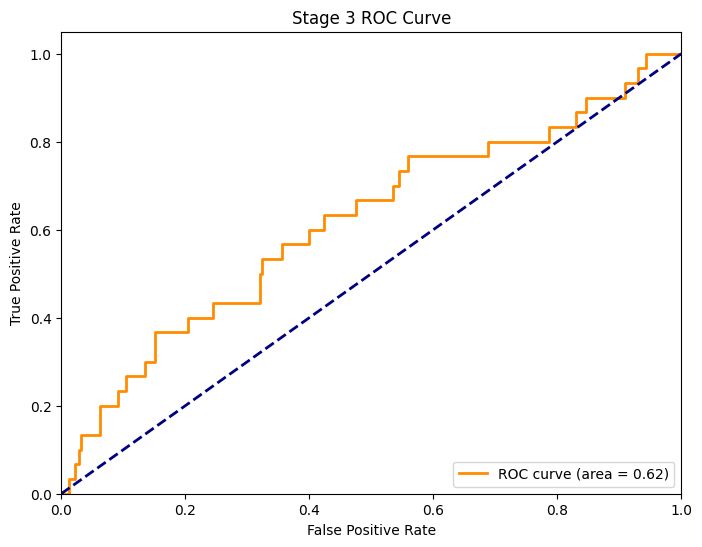

In [36]:
# Initialize the Random Forest classifier
rf_pca = RandomForestClassifier(bootstrap = True, max_depth = 100, 
                                       random_state = 42, max_features = 2,
                                       min_samples_leaf = 2, min_samples_split= 10,
                                       n_estimators = 200)

# Train the classifier
rf_pca.fit(X_train_pca, y_train)

# Predict probabilities for test set
y_pred_proba_pca = rf_pca.predict_proba(X_test_pca)[:, 1]

# Calculate Prediction Accuracy
print("Prediction Mean Accuracy: ", rf_pca.score(X_test_pca, y_test))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba_pca)
print("Baseline ROC AUC score:", roc_auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pca)

# Calculate ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stage 3 ROC Curve')
plt.legend(loc="lower right")
plt.show()

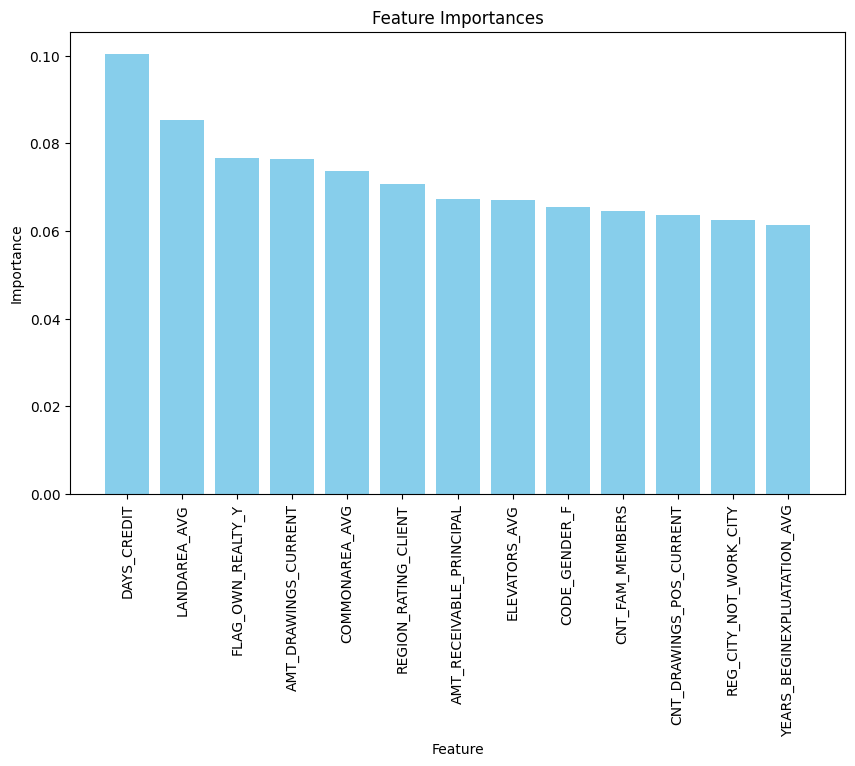

Low Importance Features to Remove:
['CNT_FAM_MEMBERS', 'CNT_DRAWINGS_POS_CURRENT', 'REG_CITY_NOT_WORK_CITY', 'YEARS_BEGINEXPLUATATION_AVG']


In [37]:
stage3_feature_importances = rf_pca.feature_importances_

# Create a DataFrame to store feature importances
stage3_importance_df = pd.DataFrame(data = stage3_feature_importances, 
                                    index = X_train_pca.columns.values, columns = ['Importance'])


# Sort features by importance
stage3_importance_df = stage3_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(stage3_importance_df.index, stage3_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()

# Remove low-importance features
# Adjust threshold as needed
stage3_low_importance_threshold = np.percentile(stage3_importance_df['Importance'], 25)  
stage3_low_importance_features = stage3_importance_df[stage3_importance_df['Importance'] < stage3_low_importance_threshold].index.to_list()
print("Low Importance Features to Remove:")
print(stage3_low_importance_features)

Prediction Mean Accuracy with Reduced Features:  0.9137931034482759
ROC AUC Score with Reduced Features: 0.6158280922431866


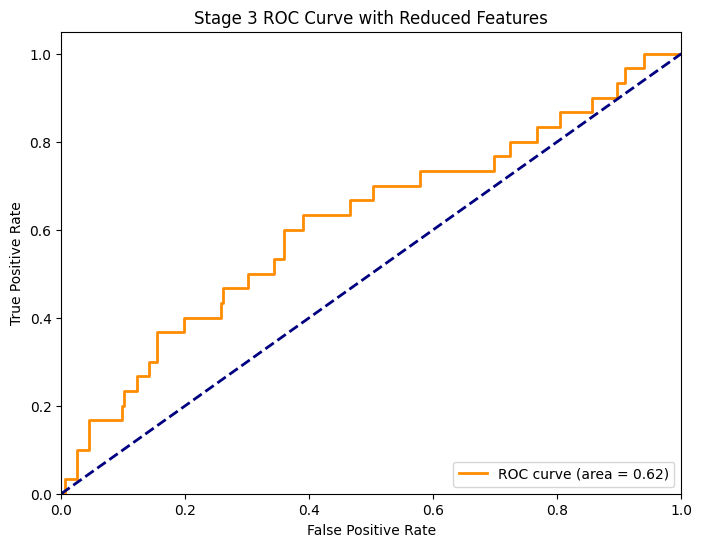

In [38]:
# Remove low-importance features from the dataset
X_train_pca_reduced = X_train_pca.drop(columns = stage3_low_importance_features)
X_test_pca_reduced = X_test_pca.drop(columns = stage3_low_importance_features)

# Retrain the model with reduced features
rf_pca_reduced = RandomForestClassifier(bootstrap = True, max_depth = 100, 
                                       random_state = 42, max_features = 2,
                                       min_samples_leaf = 2, min_samples_split= 10,
                                       n_estimators = 200)

# Train the classifier
rf_pca_reduced.fit(X_train_pca_reduced, y_train)

# Predict probabilities for test set
y_pred_proba_pca_reduced = rf_pca_reduced.predict_proba(X_test_pca_reduced)[:, 1]


# Calculate Prediction Accuracy
print("Prediction Mean Accuracy with Reduced Features: ", rf_pca_reduced.score(X_test_pca_reduced, y_test))

# Calculate ROC AUC score
roc_auc_reduced = roc_auc_score(y_test, y_pred_proba_pca_reduced)
print("ROC AUC Score with Reduced Features:", roc_auc_reduced)

# Calculate ROC curve with Reduced Features
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pca_reduced)

# Calculate ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stage 3 ROC Curve with Reduced Features')
plt.legend(loc="lower right")
plt.show()

In [39]:
stage3_high_importance_threshold = np.percentile(stage3_importance_df['Importance'], 25)  
stage3_high_importance_df = stage3_importance_df[stage3_importance_df['Importance'] > stage3_high_importance_threshold]
stage3_high_importance_df

,Importance
DAYS_CREDIT,0.100472
LANDAREA_AVG,0.085332
FLAG_OWN_REALTY_Y,0.076767
AMT_DRAWINGS_CURRENT,0.076360
COMMONAREA_AVG,0.073743
REGION_RATING_CLIENT,0.070708
AMT_RECEIVABLE_PRINCIPAL,0.067292
ELEVATORS_AVG,0.067008
CODE_GENDER_F,0.065377
COMMONAREA_AVG,0.064849


## Stage 4 (POS_CASH_balance)

In [40]:
# cash = pd.read_csv('/kaggle/input/credit-risk/POS_CASH_balance.csv')

# # fill none value with the mean for each SK_ID_CURR group in credit
# cash_null_col = cash.columns[cash.isnull().any()]
# for i in range(len(cash_null_col)):
#     full_col = cash.groupby(["SK_ID_CURR"])[cash_null_col[i]].apply(lambda x:x.fillna(x.mean()))
#     cash[cash_null_col[i]] = full_col.reset_index(level=0, drop=True)

# cash['NAME_CONTRACT_STATUS'] = cash['NAME_CONTRACT_STATUS'].astype('category')
# cash['NAME_CONTRACT_STATUS'] = pd.factorize(cash['NAME_CONTRACT_STATUS'])[0]
# cash = cash.dropna()

# cash_group = cash.groupby('SK_ID_CURR').agg({
#     'MONTHS_BALANCE': 'mean', 
#     'CNT_INSTALMENT': 'mean',
#     'CNT_INSTALMENT_FUTURE': 'mean', 
#     'NAME_CONTRACT_STATUS': lambda x: x.value_counts().index[0], 
#     'SK_DPD': 'mean',
#     'SK_DPD_DEF': 'mean'
# })

# cash_group = cash_group.reset_index()
# cash_group.to_csv('r"kaggle\output\cash_group.csv')
# stage4 = pd.merge(stage3, cash_group, on='SK_ID_CURR', how='left')
# stage4.to_csv(r"kaggle\output\app_train_stage4.csv")

In [41]:
cash_group = pd.read_csv('/kaggle/input/test-stage/cash_group.csv')
cash_group = cash_group.loc[:, 'SK_ID_CURR':]

duplicate_col = []
for col in cash_group.columns.values:
    if col in train.columns.values:
        duplicate_col.append(col)   
duplicate_col = duplicate_col[1:]

cash_group = cash_group.drop(columns = duplicate_col)

stage4 = pd.merge(stage3, cash_group, on='SK_ID_CURR', how='left')

stage4_encoded = stage4.dropna()
stage4_encoded = stage4_encoded.loc[:, 'SK_ID_CURR':]
stage4_encoded = stage4_encoded.drop(columns = ['SK_ID_CURR'])

stage4_cate_col = stage4_encoded.select_dtypes(include=['object']).columns.tolist()

# train set One Hot encoding use the categorical variable list
stage4_encoded = pd.get_dummies(stage4_encoded, columns = stage4_cate_col).astype(int)
stage4_encoded

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
124,0,1,202500,260725,16789,198000,0,-16282,-4375,-762,...,0,0,0,0,0,1,0,0,1,0
343,0,0,225000,888840,32053,675000,0,-16719,-687,-8892,...,0,0,0,0,0,0,1,0,1,0
803,0,3,112500,832500,24471,832500,0,-13765,-1806,-8001,...,0,0,0,0,0,0,1,0,1,0
917,0,0,225000,454500,46570,454500,0,-12229,-4078,-90,...,0,0,0,0,0,1,0,0,1,0
1238,0,0,810000,661500,37066,661500,0,-21766,-5065,-11148,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305198,0,0,238500,1129500,46003,1129500,0,-12799,-145,-6517,...,0,0,0,0,0,1,0,0,1,0
306013,0,1,202500,281938,21946,252000,0,-11514,-266,-5837,...,0,0,0,0,0,0,1,0,1,0
306168,0,1,360000,1051294,34042,918000,0,-11380,-74,-87,...,0,0,0,0,0,0,1,0,1,0
306602,0,1,135000,270000,25897,270000,0,-9768,-1483,-2135,...,0,0,0,0,0,1,0,0,1,0


In [42]:
X = stage4_encoded.drop(columns = ["TARGET"])
y = stage4_encoded['TARGET']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

# Calculate the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to keep for 25% variance explained
n_components = np.argmax(cumulative_variance_ratio >= 0.25) + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Find the most important feature names for training set
X_train_important = [np.abs(pca.components_[i]).argmax() for i in range(n_components)]
X_train_col_names = X_train.columns.values
X_train_pca_features = [X_train_col_names[X_train_important[i]] for i in range(n_components)]

# Find the most important feature names for testing set
X_test_important = [np.abs(pca.components_[i]).argmax() for i in range(n_components)]
X_test_col_names = X_test.columns.values
X_test_pca_features = [X_test_col_names[X_test_important[i]] for i in range(n_components)]

# turn X_train_pca and X_test_pca into dataframe
X_train_pca = pd.DataFrame(X_train_pca, columns = X_train_pca_features)
X_test_pca = pd.DataFrame(X_test_pca, columns = X_test_pca_features)

# Display the results
print("Original Training Data Shape:", X_train.shape)
print("Reduced Training Data Shape (PCA):", X_train_pca.shape)
print("Number of Components Selected:", n_components)

Original Training Data Shape: (1330, 273)
Reduced Training Data Shape (PCA): (1330, 15)
Number of Components Selected: 15


Prediction Mean Accuracy:  0.9219219219219219
Baseline ROC AUC score: 0.5314457529441243


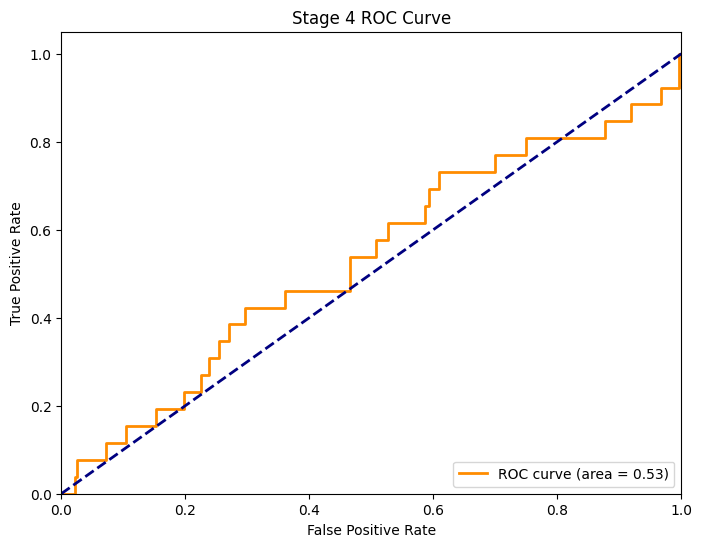

In [43]:
# Initialize the Random Forest classifier
rf_pca = RandomForestClassifier(bootstrap = True, max_depth = 100, 
                                       random_state = 42, max_features = 2,
                                       min_samples_leaf = 2, min_samples_split= 10,
                                       n_estimators = 200)

# Train the classifier
rf_pca.fit(X_train_pca, y_train)

# Predict probabilities for test set
y_pred_proba_pca = rf_pca.predict_proba(X_test_pca)[:, 1]

# Calculate Prediction Accuracy
print("Prediction Mean Accuracy: ", rf_pca.score(X_test_pca, y_test))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba_pca)
print("Baseline ROC AUC score:", roc_auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pca)

# Calculate ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stage 4 ROC Curve')
plt.legend(loc="lower right")
plt.show()

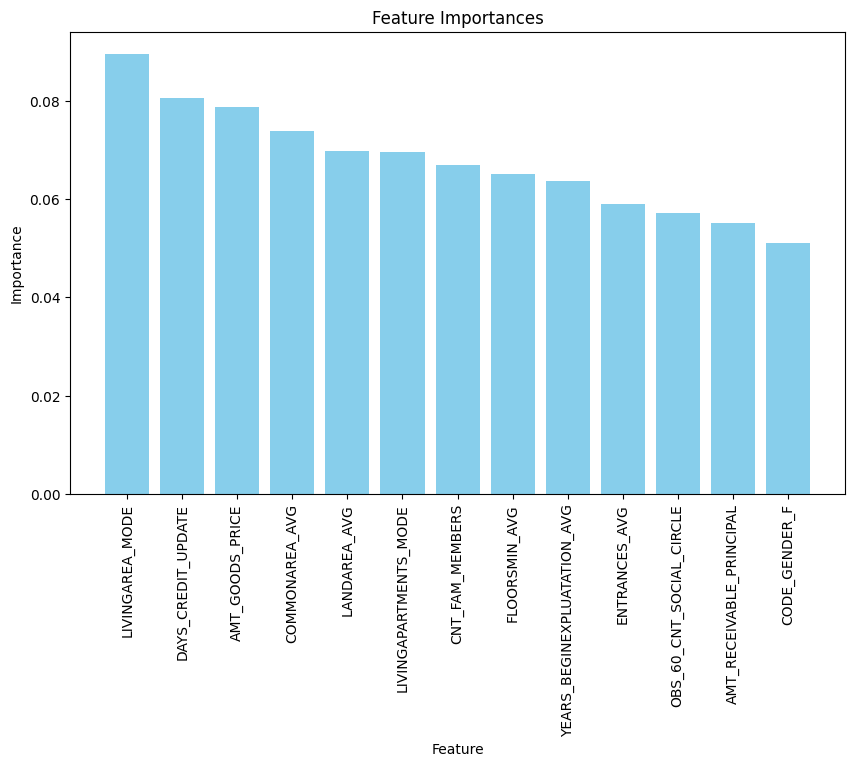

Low Importance Features to Remove:
['ENTRANCES_AVG', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_RECEIVABLE_PRINCIPAL', 'CODE_GENDER_F']


In [44]:
stage4_feature_importances = rf_pca.feature_importances_

# Create a DataFrame to store feature importances
stage4_importance_df = pd.DataFrame(data = stage4_feature_importances, 
                                    index = X_train_pca.columns.values, columns = ['Importance'])


# Sort features by importance
stage4_importance_df = stage4_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(stage4_importance_df.index, stage4_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()

# Remove low-importance features
# Adjust threshold as needed
stage4_low_importance_threshold = np.percentile(stage4_importance_df['Importance'], 25)  
stage4_low_importance_features = stage4_importance_df[stage4_importance_df['Importance'] < stage4_low_importance_threshold].index.to_list()
print("Low Importance Features to Remove:")
print(stage4_low_importance_features)

Prediction Mean Accuracy with Reduced Features:  0.9219219219219219
ROC AUC Score with Reduced Features: 0.5336381859183162


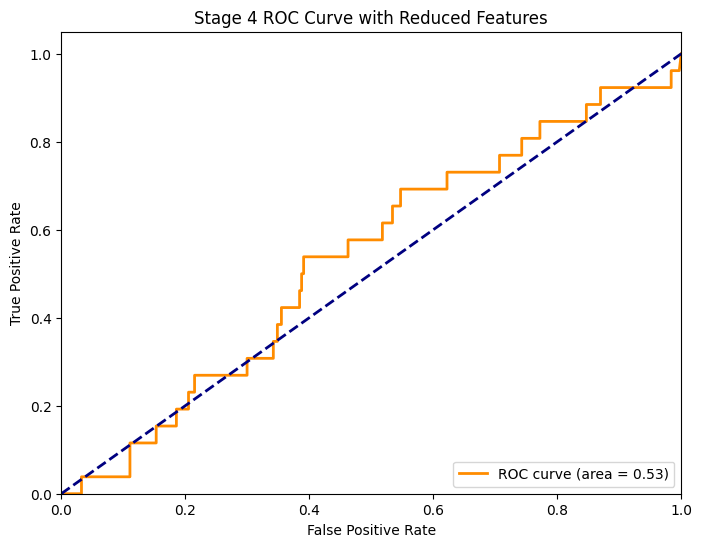

In [45]:
# Remove low-importance features from the dataset
X_train_pca_reduced = X_train_pca.drop(columns = stage4_low_importance_features)
X_test_pca_reduced = X_test_pca.drop(columns = stage4_low_importance_features)

# Retrain the model with reduced features
rf_pca_reduced = RandomForestClassifier(bootstrap = True, max_depth = 100, 
                                       random_state = 42, max_features = 2,
                                       min_samples_leaf = 2, min_samples_split= 10,
                                       n_estimators = 200)

# Train the classifier
rf_pca_reduced.fit(X_train_pca_reduced, y_train)

# Predict probabilities for test set
y_pred_proba_pca_reduced = rf_pca_reduced.predict_proba(X_test_pca_reduced)[:, 1]


# Calculate Prediction Accuracy
print("Prediction Mean Accuracy with Reduced Features: ", rf_pca_reduced.score(X_test_pca_reduced, y_test))

# Calculate ROC AUC score
roc_auc_reduced = roc_auc_score(y_test, y_pred_proba_pca_reduced)
print("ROC AUC Score with Reduced Features:", roc_auc_reduced)

# Calculate ROC curve with Reduced Features
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pca_reduced)

# Calculate ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stage 4 ROC Curve with Reduced Features')
plt.legend(loc="lower right")
plt.show()

In [46]:
stage4_high_importance_threshold = np.percentile(stage4_importance_df['Importance'], 25)  
stage4_high_importance_df = stage4_importance_df[stage4_importance_df['Importance'] > stage4_high_importance_threshold]
stage4_high_importance_df

,Importance
LIVINGAREA_MODE,0.089611
DAYS_CREDIT_UPDATE,0.080581
AMT_GOODS_PRICE,0.078813
COMMONAREA_AVG,0.073907
LANDAREA_AVG,0.069740
LIVINGAPARTMENTS_MODE,0.069684
CNT_FAM_MEMBERS,0.066927
FLOORSMIN_AVG,0.065178
YEARS_BEGINEXPLUATATION_AVG,0.063599
COMMONAREA_AVG,0.060748


## Stage 5 (installments_payments)

In [47]:
# pay = pd.read_csv('/kaggle/input/credit-risk/installments_payments.csv')
# pay_null_col = pay.columns[pay.isnull().any()]
# for i in range(len(pay_null_col)):
#     full_col = pay.groupby(["SK_ID_CURR"])[pay_null_col[i]].apply(lambda x: x.fillna(x.mean()))
#     pay[pay_null_col[i]] = full_col.reset_index(level=0, drop=True)
# pay = pay.dropna()

# pay_group = pay.groupby('SK_ID_CURR').agg({
#     'NUM_INSTALMENT_VERSION':'mean',
#     'NUM_INSTALMENT_NUMBER':'mean', 
#     'DAYS_INSTALMENT':'mean', 
#     'DAYS_ENTRY_PAYMENT':'mean',
#     'AMT_INSTALMENT':'mean', 
#     'AMT_PAYMENT':'mean'
# })

# pay_group = pay_group.reset_index()
# pay_group.to_csv('kaggle\output\pay_group.csv')
# stage5 = pd.merge(stage4, pay_group, on='SK_ID_CURR', how='left')
# stage5.to_csv(r"kaggle\output\app_train_stage5.csv")

In [48]:
pay_group = pd.read_csv('/kaggle/input/test-stage/pay_group.csv')
pay_group = pay_group.loc[:, 'SK_ID_CURR':]

duplicate_col = []
for col in pay_group.columns.values:
    if col in train.columns.values:
        duplicate_col.append(col)
duplicate_col = duplicate_col[1:]

pay_group = pay_group.drop(columns = duplicate_col)

stage5 = pd.merge(stage4, pay_group, on='SK_ID_CURR', how='left')
stage5_encoded = stage5.dropna()
stage5_encoded = stage5_encoded.loc[:, 'SK_ID_CURR':]
stage5_encoded = stage5_encoded.drop(columns = ['SK_ID_CURR'])

stage5_cate_col = stage5_encoded.select_dtypes(include=['object']).columns.tolist()

# train set One Hot encoding use the categorical variable list
stage5_encoded = pd.get_dummies(stage5_encoded, columns = stage5_cate_col).astype(int)
stage5_encoded

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
124,0,1,202500,260725,16789,198000,0,-16282,-4375,-762,...,0,0,0,0,0,1,0,0,1,0
343,0,0,225000,888840,32053,675000,0,-16719,-687,-8892,...,0,0,0,0,0,0,1,0,1,0
803,0,3,112500,832500,24471,832500,0,-13765,-1806,-8001,...,0,0,0,0,0,0,1,0,1,0
917,0,0,225000,454500,46570,454500,0,-12229,-4078,-90,...,0,0,0,0,0,1,0,0,1,0
1238,0,0,810000,661500,37066,661500,0,-21766,-5065,-11148,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305198,0,0,238500,1129500,46003,1129500,0,-12799,-145,-6517,...,0,0,0,0,0,1,0,0,1,0
306013,0,1,202500,281938,21946,252000,0,-11514,-266,-5837,...,0,0,0,0,0,0,1,0,1,0
306168,0,1,360000,1051294,34042,918000,0,-11380,-74,-87,...,0,0,0,0,0,0,1,0,1,0
306602,0,1,135000,270000,25897,270000,0,-9768,-1483,-2135,...,0,0,0,0,0,1,0,0,1,0


In [49]:
X = stage5_encoded.drop(columns = ["TARGET"])
y = stage5_encoded['TARGET']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

# Calculate the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to keep for 25% variance explained
n_components = np.argmax(cumulative_variance_ratio >= 0.25) + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Find the most important feature names for training set
X_train_important = [np.abs(pca.components_[i]).argmax() for i in range(n_components)]
X_train_col_names = X_train.columns.values
X_train_pca_features = [X_train_col_names[X_train_important[i]] for i in range(n_components)]

# Find the most important feature names for testing set
X_test_important = [np.abs(pca.components_[i]).argmax() for i in range(n_components)]
X_test_col_names = X_test.columns.values
X_test_pca_features = [X_test_col_names[X_test_important[i]] for i in range(n_components)]

# turn X_train_pca and X_test_pca into dataframe
X_train_pca = pd.DataFrame(X_train_pca, columns = X_train_pca_features)
X_test_pca = pd.DataFrame(X_test_pca, columns = X_test_pca_features)

# Display the results
print("Original Training Data Shape:", X_train.shape)
print("Reduced Training Data Shape (PCA):", X_train_pca.shape)
print("Number of Components Selected:", n_components)

Original Training Data Shape: (1330, 279)
Reduced Training Data Shape (PCA): (1330, 15)
Number of Components Selected: 15


Prediction Mean Accuracy:  0.9219219219219219
Baseline ROC AUC score: 0.5588824855925834


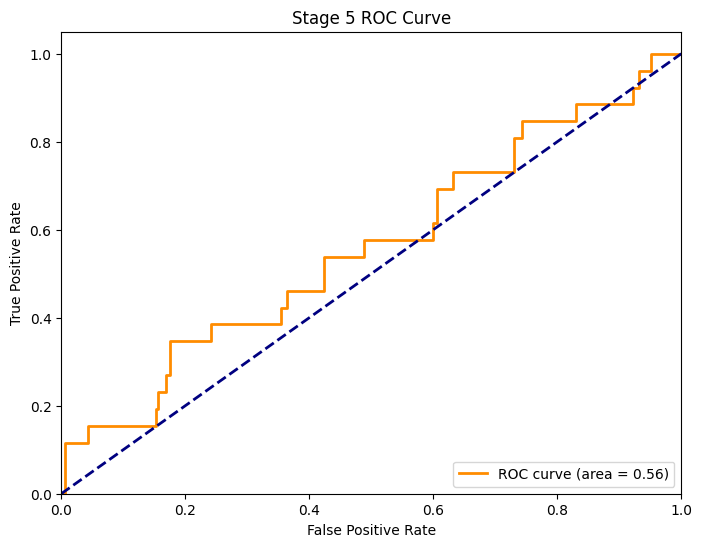

In [50]:
# Initialize the Random Forest classifier
rf_pca = RandomForestClassifier(bootstrap = True, max_depth = 100, 
                                       random_state = 42, max_features = 2,
                                       min_samples_leaf = 2, min_samples_split= 10,
                                       n_estimators = 200)

# Train the classifier
rf_pca.fit(X_train_pca, y_train)

# Predict probabilities for test set
y_pred_proba_pca = rf_pca.predict_proba(X_test_pca)[:, 1]

# Calculate Prediction Accuracy
print("Prediction Mean Accuracy: ", rf_pca.score(X_test_pca, y_test))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba_pca)
print("Baseline ROC AUC score:", roc_auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pca)

# Calculate ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stage 5 ROC Curve')
plt.legend(loc="lower right")
plt.show()

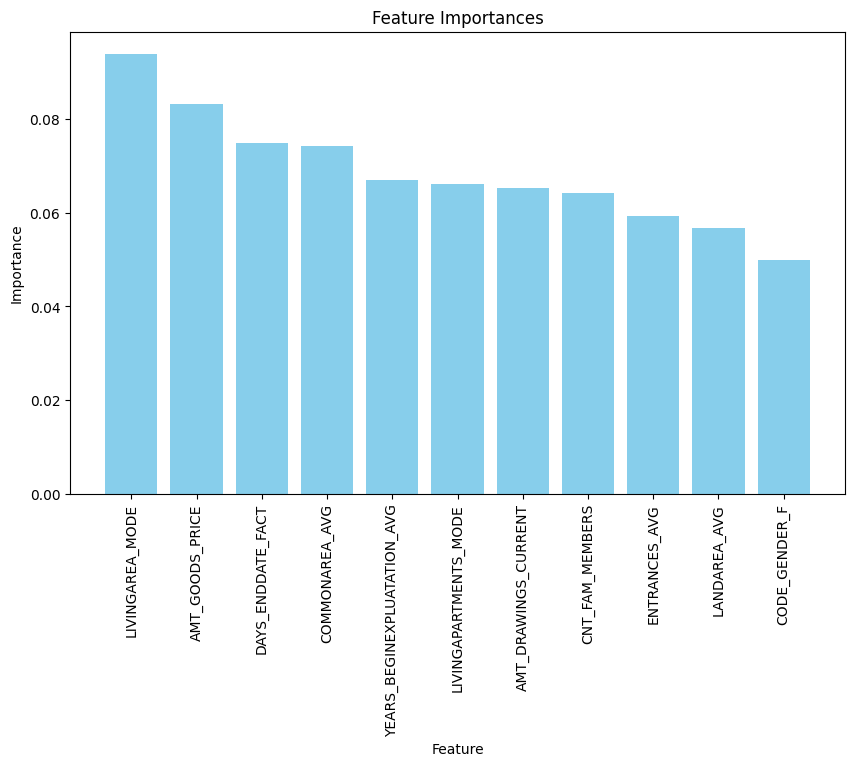

Low Importance Features to Remove:
['COMMONAREA_AVG', 'ENTRANCES_AVG', 'LANDAREA_AVG', 'CODE_GENDER_F']


In [51]:
stage5_feature_importances = rf_pca.feature_importances_

# Create a DataFrame to store feature importances
stage5_importance_df = pd.DataFrame(data = stage5_feature_importances, 
                                    index = X_train_pca.columns.values, columns = ['Importance'])


# Sort features by importance
stage5_importance_df = stage5_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(stage5_importance_df.index, stage5_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()

# Remove low-importance features
# Adjust threshold as needed
stage5_low_importance_threshold = np.percentile(stage5_importance_df['Importance'], 25)  
stage5_low_importance_features = stage5_importance_df[stage5_importance_df['Importance'] < stage5_low_importance_threshold].index.to_list()
print("Low Importance Features to Remove:")
print(stage5_low_importance_features)

Prediction Mean Accuracy with Reduced Features:  0.9219219219219219
ROC AUC Score with Reduced Features: 0.5236782761212728


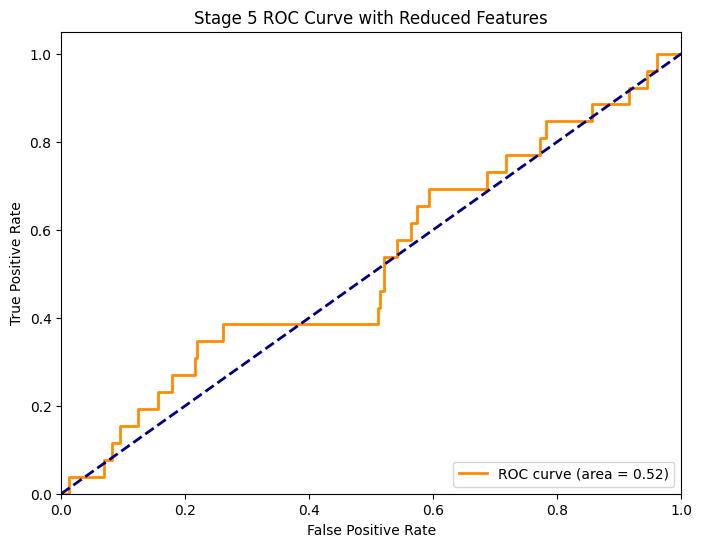

In [52]:
# Remove low-importance features from the dataset
X_train_pca_reduced = X_train_pca.drop(columns = stage5_low_importance_features)
X_test_pca_reduced = X_test_pca.drop(columns = stage5_low_importance_features)

# Retrain the model with reduced features
rf_pca_reduced = RandomForestClassifier(bootstrap = True, max_depth = 100, 
                                       random_state = 42, max_features = 2,
                                       min_samples_leaf = 2, min_samples_split= 10,
                                       n_estimators = 200)

# Train the classifier
rf_pca_reduced.fit(X_train_pca_reduced, y_train)

# Predict probabilities for test set
y_pred_proba_pca_reduced = rf_pca_reduced.predict_proba(X_test_pca_reduced)[:, 1]


# Calculate Prediction Accuracy
print("Prediction Mean Accuracy with Reduced Features: ", rf_pca_reduced.score(X_test_pca_reduced, y_test))

# Calculate ROC AUC score
roc_auc_reduced = roc_auc_score(y_test, y_pred_proba_pca_reduced)
print("ROC AUC Score with Reduced Features:", roc_auc_reduced)

# Calculate ROC curve with Reduced Features
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pca_reduced)

# Calculate ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stage 5 ROC Curve with Reduced Features')
plt.legend(loc="lower right")
plt.show()

In [53]:
stage5_high_importance_threshold = np.percentile(stage5_importance_df['Importance'], 25)  
stage5_high_importance_df = stage5_importance_df[stage5_importance_df['Importance'] > stage5_high_importance_threshold]
stage5_high_importance_df

,Importance
LIVINGAREA_MODE,0.093964
AMT_GOODS_PRICE,0.083318
DAYS_ENDDATE_FACT,0.075001
COMMONAREA_AVG,0.074264
COMMONAREA_AVG,0.067196
YEARS_BEGINEXPLUATATION_AVG,0.066973
LIVINGAPARTMENTS_MODE,0.066166
AMT_DRAWINGS_CURRENT,0.065215
CNT_FAM_MEMBERS,0.064302
LIVINGAPARTMENTS_MODE,0.060422


## Stage 6 (previous_installment)

In [54]:
# prev = pd.read_csv('/kaggle/input/credit-risk/previous_application.csv')
# prev

# # find categorical columns
# prev_cate_col = prev.select_dtypes(include=['object']).columns.tolist()
# print('In Prev Dataset, There are totally', len(prev_cate_col), 'categorical columns')
# prev_cate = prev[prev_cate_col]

# # find numerical columns
# prev_num_col = prev.select_dtypes(exclude=['object']).columns.tolist()
# print('In Prev Dataset, There are totally', len(prev_num_col), 'numerical columns')
# prev_num = prev[prev_num_col]
# prev_num_null_col = prev_num.columns[prev_num.isnull().any()]

# prev_fill = prev.copy()
# for i in range(len(prev_num_null_col)):
#     full_col = prev_fill.groupby(["SK_ID_CURR"])[prev_num_null_col[i]].apply(lambda x: x.fillna(x.mean()))
#     prev_fill[prev_num_null_col[i]] = full_col.reset_index(level=0, drop=True)

# prev_col = prev_fill.columns.values
# prev_num_null = []

# for i in range(len(prev_col)):
#     num_null = [prev_fill[prev_col[i]].isnull().sum()]
#     prev_num_null.append(num_null)
  
# prev_num_null_df = pd.DataFrame(prev_num_null, 
#                                 index = np.array(prev_col).reshape(37,1), columns = ['count'])
# prev_num_null_df = prev_num_null_df.sort_values(by='count', ascending = False)

# prev_fill = prev_fill.drop(columns = ['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY',
#        'NAME_TYPE_SUITE', 'RATE_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT', 'PRODUCT_COMBINATION'])
# prev_fill = prev_fill.dropna()

# prev_fill_cate_col = prev_fill.select_dtypes(include=['object']).columns.tolist()
# for i in range(len(prev_fill_cate_col)):
#     prev_fill[prev_fill_cate_col[i]] = prev_fill[prev_fill_cate_col[i]].astype('category')
#     prev_fill[prev_fill_cate_col[i]] = pd.factorize(prev_fill[prev_fill_cate_col[i]])[0]

# prev_group = prev_fill.groupby('SK_ID_CURR').agg({
#     'NAME_CONTRACT_TYPE': lambda x: x.value_counts().index[0],
#     'WEEKDAY_APPR_PROCESS_START': lambda x: x.value_counts().index[0],
#     'FLAG_LAST_APPL_PER_CONTRACT': lambda x: x.value_counts().index[0],
#     'NAME_CASH_LOAN_PURPOSE': lambda x: x.value_counts().index[0],
#     'NAME_CONTRACT_STATUS': lambda x: x.value_counts().index[0],
#     'NAME_PAYMENT_TYPE': lambda x: x.value_counts().index[0],
#     'CODE_REJECT_REASON': lambda x: x.value_counts().index[0],
#     'NAME_CLIENT_TYPE': lambda x: x.value_counts().index[0],
#     'NAME_GOODS_CATEGORY': lambda x: x.value_counts().index[0],
#     'NAME_PORTFOLIO': lambda x: x.value_counts().index[0],
#     'NAME_PRODUCT_TYPE': lambda x: x.value_counts().index[0],
#     'CHANNEL_TYPE': lambda x: x.value_counts().index[0],
#     'NAME_SELLER_INDUSTRY': lambda x: x.value_counts().index[0],
#     'NAME_YIELD_GROUP': lambda x: x.value_counts().index[0],
    
#     'AMT_ANNUITY': 'mean',
#     'AMT_APPLICATION': 'mean', 
#     'AMT_CREDIT': 'mean', 
#     'AMT_GOODS_PRICE': 'mean',
#     'HOUR_APPR_PROCESS_START': 'mean',
#     'NFLAG_LAST_APPL_IN_DAY': 'mean',
#     'DAYS_DECISION': 'mean',
#     'SELLERPLACE_AREA': 'mean', 
#     'CNT_PAYMENT': 'mean', 
#     'DAYS_FIRST_DRAWING': 'mean',
#     'DAYS_FIRST_DUE': 'mean', 
#     'DAYS_LAST_DUE_1ST_VERSION': 'mean', 
#     'DAYS_LAST_DUE': 'mean',
#     'DAYS_TERMINATION': 'mean', 
#     'NFLAG_INSURED_ON_APPROVAL': 'mean'
# })

# prev_group = prev_group.reset_index()
# prev_group.to_csv('kaggle\output\prev_group.csv')
# stage6 = pd.merge(stage5, prev_group, on='SK_ID_CURR', how='left')
# stage6.to_csv(r"kaggle\output\app_train_stage6.csv")

In [55]:
prev_group = pd.read_csv('/kaggle/input/test-stage/prev_group.csv')
prev_group = prev_group.loc[:, 'SK_ID_CURR':]

duplicate_col = []
for col in prev_group.columns.values:
    if col in train.columns.values:
        duplicate_col.append(col)
duplicate_col = duplicate_col[1:]

prev_group = prev_group.drop(columns = duplicate_col)

stage6 = pd.merge(stage5, prev_group, on='SK_ID_CURR', how='left')
stage6_encoded = stage6.dropna()
stage6_encoded = stage6_encoded.loc[:, 'SK_ID_CURR':]
stage6_encoded = stage6_encoded.drop(columns = ['SK_ID_CURR'])

stage6_cate_col = stage6_encoded.select_dtypes(include=['object']).columns.tolist()

# train set One Hot encoding use the categorical variable list
stage6_encoded = pd.get_dummies(stage6_encoded, columns = stage6_cate_col).astype(int)
stage6_encoded

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
124,0,1,202500,260725,16789,198000,0,-16282,-4375,-762,...,0,0,0,0,0,1,0,0,1,0
343,0,0,225000,888840,32053,675000,0,-16719,-687,-8892,...,0,0,0,0,0,0,1,0,1,0
803,0,3,112500,832500,24471,832500,0,-13765,-1806,-8001,...,0,0,0,0,0,0,1,0,1,0
917,0,0,225000,454500,46570,454500,0,-12229,-4078,-90,...,0,0,0,0,0,1,0,0,1,0
1238,0,0,810000,661500,37066,661500,0,-21766,-5065,-11148,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305198,0,0,238500,1129500,46003,1129500,0,-12799,-145,-6517,...,0,0,0,0,0,1,0,0,1,0
306013,0,1,202500,281938,21946,252000,0,-11514,-266,-5837,...,0,0,0,0,0,0,1,0,1,0
306168,0,1,360000,1051294,34042,918000,0,-11380,-74,-87,...,0,0,0,0,0,0,1,0,1,0
306602,0,1,135000,270000,25897,270000,0,-9768,-1483,-2135,...,0,0,0,0,0,1,0,0,1,0


In [56]:
X = stage6_encoded.drop(columns = ["TARGET"])
y = stage6_encoded['TARGET']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

# Calculate the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to keep for 25% variance explained
n_components = np.argmax(cumulative_variance_ratio >= 0.25) + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Find the most important feature names for training set
X_train_important = [np.abs(pca.components_[i]).argmax() for i in range(n_components)]
X_train_col_names = X_train.columns.values
X_train_pca_features = [X_train_col_names[X_train_important[i]] for i in range(n_components)]

# Find the most important feature names for testing set
X_test_important = [np.abs(pca.components_[i]).argmax() for i in range(n_components)]
X_test_col_names = X_test.columns.values
X_test_pca_features = [X_test_col_names[X_test_important[i]] for i in range(n_components)]

# turn X_train_pca and X_test_pca into dataframe
X_train_pca = pd.DataFrame(X_train_pca, columns = X_train_pca_features)
X_test_pca = pd.DataFrame(X_test_pca, columns = X_test_pca_features)

# Display the results
print("Original Training Data Shape:", X_train.shape)
print("Reduced Training Data Shape (PCA):", X_train_pca.shape)
print("Number of Components Selected:", n_components)

Original Training Data Shape: (1315, 302)
Reduced Training Data Shape (PCA): (1315, 15)
Number of Components Selected: 15


Prediction Mean Accuracy:  0.9179331306990881
Baseline ROC AUC score: 0.48233995584988953


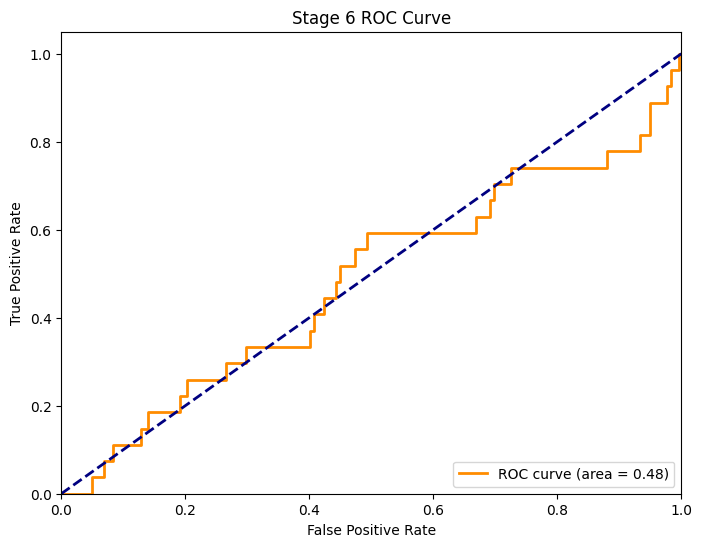

In [57]:
# Initialize the Random Forest classifier
rf_pca = RandomForestClassifier(bootstrap = True, max_depth = 100, 
                                       random_state = 42, max_features = 2,
                                       min_samples_leaf = 2, min_samples_split= 10,
                                       n_estimators = 200)

# Train the classifier
rf_pca.fit(X_train_pca, y_train)

# Predict probabilities for test set
y_pred_proba_pca = rf_pca.predict_proba(X_test_pca)[:, 1]

# Calculate Prediction Accuracy
print("Prediction Mean Accuracy: ", rf_pca.score(X_test_pca, y_test))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba_pca)
print("Baseline ROC AUC score:", roc_auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pca)

# Calculate ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stage 6 ROC Curve')
plt.legend(loc="lower right")
plt.show()

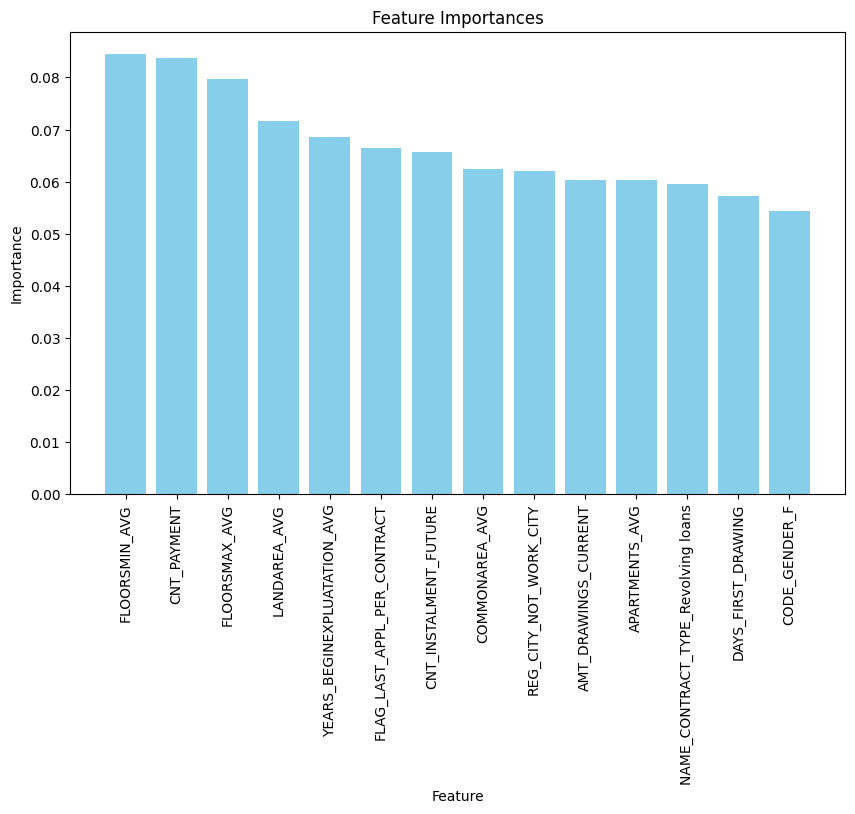

Low Importance Features to Remove:
['APARTMENTS_AVG', 'NAME_CONTRACT_TYPE_Revolving loans', 'DAYS_FIRST_DRAWING', 'CODE_GENDER_F']


In [58]:
stage6_feature_importances = rf_pca.feature_importances_

# Create a DataFrame to store feature importances
stage6_importance_df = pd.DataFrame(data = stage6_feature_importances, 
                                    index = X_train_pca.columns.values, columns = ['Importance'])


# Sort features by importance
stage6_importance_df = stage6_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(stage6_importance_df.index, stage6_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()

# Remove low-importance features
# Adjust threshold as needed
stage6_low_importance_threshold = np.percentile(stage6_importance_df['Importance'], 25)  
stage6_low_importance_features = stage6_importance_df[stage6_importance_df['Importance'] < stage6_low_importance_threshold].index.to_list()
print("Low Importance Features to Remove:")
print(stage6_low_importance_features)

Prediction Mean Accuracy with Reduced Features:  0.9148936170212766
ROC AUC Score with Reduced Features: 0.5006131959774344


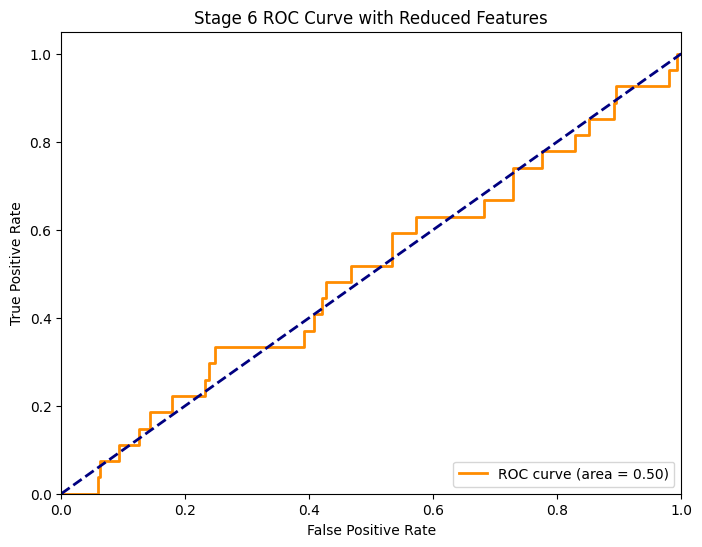

In [59]:
# Remove low-importance features from the dataset
X_train_pca_reduced = X_train_pca.drop(columns = stage6_low_importance_features)
X_test_pca_reduced = X_test_pca.drop(columns = stage6_low_importance_features)

# Retrain the model with reduced features
rf_pca_reduced = RandomForestClassifier(bootstrap = True, max_depth = 100, 
                                       random_state = 42, max_features = 2,
                                       min_samples_leaf = 2, min_samples_split= 10,
                                       n_estimators = 200)

# Train the classifier
rf_pca_reduced.fit(X_train_pca_reduced, y_train)

# Predict probabilities for test set
y_pred_proba_pca_reduced = rf_pca_reduced.predict_proba(X_test_pca_reduced)[:, 1]


# Calculate Prediction Accuracy
print("Prediction Mean Accuracy with Reduced Features: ", rf_pca_reduced.score(X_test_pca_reduced, y_test))

# Calculate ROC AUC score
roc_auc_reduced = roc_auc_score(y_test, y_pred_proba_pca_reduced)
print("ROC AUC Score with Reduced Features:", roc_auc_reduced)

# Calculate ROC curve with Reduced Features
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pca_reduced)

# Calculate ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stage 6 ROC Curve with Reduced Features')
plt.legend(loc="lower right")
plt.show()

In [60]:
stage6_high_importance_threshold = np.percentile(stage6_importance_df['Importance'], 25)  
stage6_high_importance_df = stage6_importance_df[stage6_importance_df['Importance'] > stage6_high_importance_threshold]
stage6_high_importance_df

,Importance
FLOORSMIN_AVG,0.084542
CNT_PAYMENT,0.083731
FLOORSMAX_AVG,0.079742
LANDAREA_AVG,0.071606
YEARS_BEGINEXPLUATATION_AVG,0.068502
FLAG_LAST_APPL_PER_CONTRACT,0.066367
CNT_INSTALMENT_FUTURE,0.065611
FLAG_LAST_APPL_PER_CONTRACT,0.063716
COMMONAREA_AVG,0.062404
REG_CITY_NOT_WORK_CITY,0.061984


# 20. Train an LGBM model using the manually selected feature set and evaluate its test score for Version 1.

In [61]:
# # Manually select features from previous stage 1-6 training
# manually_selected_features = []

# manually_selected_features.append(stage1_high_importance_df.index.to_list())
# manually_selected_features.append(stage2_high_importance_df.index.to_list())
# manually_selected_features.append(stage3_high_importance_df.index.to_list())

# manually_selected_features.append(stage4_high_importance_df.index.to_list())
# manually_selected_features.append(stage5_high_importance_df.index.to_list())
# manually_selected_features.append(stage6_high_importance_df.index.to_list())

# manually_selected_features = [j for sub in manually_selected_features for j in sub]
# manually_selected_features = list(dict.fromkeys(manually_selected_features))

In [62]:
manually_selected_features = stage6_high_importance_df.index.to_list()
manually_selected_features = list(dict.fromkeys(manually_selected_features))
manually_selected_features

['FLOORSMIN_AVG',
 'CNT_PAYMENT',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'CNT_INSTALMENT_FUTURE',
 'COMMONAREA_AVG',
 'REG_CITY_NOT_WORK_CITY',
 'AMT_DRAWINGS_CURRENT']

In [63]:
import lightgbm as lgb
from sklearn.metrics import classification_report

# Assuming manually_selected_features is a list of manually selected feature names
# and df is your DataFrame containing the dataset

# Prepare the dataset with the manually selected feature set
df = stage6_encoded.copy()
X = df[manually_selected_features]  # Features
y = df['TARGET']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LGBM classifier
lgb_classifier = lgb.LGBMClassifier(verbose=-1)

# Train the classifier
lgb_classifier.fit(X_train, y_train)

# Predict probabilities for test set
y_pred_proba = lgb_classifier.predict_proba(X_test)[:, 1]

# Calculate Prediction Accuracy
print("Prediction Mean Accuracy for Version 1: ", lgb_classifier.score(X_test, y_test))
print('\n')

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Test ROC AUC score for Version 1:", roc_auc)
print('\n')

# Evaluate the trained classifier’s performance
y_pred = lgb_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

Prediction Mean Accuracy for Version 1:  0.9088145896656535


Test ROC AUC score for Version 1: 0.503617856266863


              precision    recall  f1-score   support

           0       0.92      0.99      0.95       302
           1       0.00      0.00      0.00        27

    accuracy                           0.91       329
   macro avg       0.46      0.50      0.48       329
weighted avg       0.84      0.91      0.87       329



# 21. Utilize Feature Tools to automatically select efficient features, remove/merge low-correlation features, and further optimize the model efficiency. You will encounter concepts such as feature primitives, Deep Feature Synthesis, etc., and train an LGBM model with the selected feature set to get Version 2, and evaluate its test score.

In [64]:
import featuretools as ft
import re

df = stage6.copy()
# Define the EntitySet
es = ft.EntitySet(id='application')
es.add_dataframe(dataframe_name = 'application', dataframe = df, index = 'SK_ID_CURR')

# Define the Problem
problem_type = 'classification'
target_entity = 'application'

# Define the Feature Primitives
primitives = ['sum', 'mean', 'count']

# Perform Deep Feature Synthesis (DFS)
feature_matrix, feature_defs = ft.dfs(entityset = es, target_dataframe_name = target_entity, 
                                      agg_primitives = primitives, max_depth=2)

# Select Efficient Features
# Here you can apply feature selection techniques to select the most relevant features
feature_matrix = feature_matrix.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
feature_matrix = feature_matrix.reset_index()
feature_matrix = feature_matrix.drop(feature_matrix.columns[0:5], axis = 1)

In [83]:
feature_matrix

,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,True,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,1.0,-606.000000,500.000000,24.000000,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000
1,False,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,...,1.0,-1305.000000,533.000000,10.000000,365243.0,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667
2,True,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,1.0,-815.000000,30.000000,4.000000,365243.0,-784.000000,-694.000000,-724.000000,-714.000000,0.000000
3,True,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,...,1.0,-272.444444,894.222222,23.000000,365243.0,91066.500000,91584.000000,182477.500000,182481.750000,0.000000
4,True,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,1.0,-1222.833333,409.166667,20.666667,365243.0,-1263.200000,-837.200000,72136.200000,72143.800000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,...,1.0,-273.000000,30.000000,8.000000,365243.0,-210.000000,0.000000,-30.000000,-25.000000,0.000000
307507,True,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,...,1.0,-2497.000000,190.000000,6.000000,365243.0,-2466.000000,-2316.000000,-2316.000000,-2311.000000,1.000000
307508,True,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,...,1.0,-2380.000000,22.000000,5.000000,365243.0,-2339.000000,-2219.000000,-2219.000000,-2212.500000,0.500000
307509,True,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,...,1.0,-299.500000,1578.000000,15.000000,365243.0,-269.000000,151.000000,365243.000000,365243.000000,0.500000


In [65]:
# Split the dataset into training and testing sets
X = feature_matrix
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an LGBM Model
lgb_classifier = lgb.LGBMClassifier(verbose=-1)
lgb_classifier.fit(X_train, y_train)

# Predict probabilities for test set
y_pred_proba = lgb_classifier.predict_proba(X_test)[:, 1]

# Calculate Prediction Accuracy
print("Prediction Mean Accuracy for Version 2: ", lgb_classifier.score(X_test, y_test))
print('\n')

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Test ROC AUC score for Version 2:", roc_auc)
print('\n')

# Evaluate the trained classifier’s performance
y_pred = lgb_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

Prediction Mean Accuracy for Version 2:  0.9203453490073655


Test ROC AUC score for Version 2: 0.7706717976270216


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.59      0.03      0.07      4949

    accuracy                           0.92     61503
   macro avg       0.75      0.52      0.51     61503
weighted avg       0.89      0.92      0.89     61503



# 22. Use Pearson correlation coefficient to calculate the correlation of Version 2 feature set, and delete one of the features for correlations above 0.9.

In [66]:
feature_matrix_cate_col = feature_matrix.select_dtypes(include=['category']).columns.tolist()
feature_matrix_encoded = pd.get_dummies(feature_matrix, columns = feature_matrix_cate_col)
feature_matrix_encoded

,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,True,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,True,False,False,False,False,False,False,False,True,False
1,False,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,True,False,False,True,False,False,False,False,False,False
2,True,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,False,False,False,False,False,False,False,False,False,False
3,True,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,False,False,False,False,False,False,False,False,False,False
4,True,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,...,True,False,False,False,False,False,False,False,True,False
307507,True,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,...,True,False,False,False,False,False,False,False,True,False
307508,True,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,...,True,False,False,False,False,False,False,True,False,False
307509,True,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,...,True,False,False,False,False,False,False,False,True,False


In [67]:
correlation_matrix = feature_matrix_encoded.corr(method = 'pearson').abs()

# Create a mask to identify highly correlated features
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Find pairs of features with correlation coefficients above 0.9
highly_correlated = np.where(correlation_matrix > 0.9)

# Remove one of the features from each highly correlated pair
features_to_remove = set()
for i, j in zip(*highly_correlated):
    if i != j and i not in features_to_remove and j not in features_to_remove:
        feature_i = correlation_matrix.columns[i]
        feature_j = correlation_matrix.columns[j]
        # Remove the feature with higher correlation with other features
        if correlation_matrix.iloc[i, :].sum() > correlation_matrix.iloc[j, :].sum():
            features_to_remove.add(feature_j)
        else:
            features_to_remove.add(feature_i)

# Remove highly correlated features from the feature set
feature_matrix_filtered = feature_matrix_encoded.drop(columns=features_to_remove)
feature_matrix_filtered

,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,True,0,202500.0,24700.5,351000.0,0.018801,-9461,-3648.0,-2120,<NA>,...,True,False,False,False,False,False,False,False,True,False
1,False,0,270000.0,35698.5,1129500.0,0.003541,-16765,-1186.0,-291,<NA>,...,True,False,False,True,False,False,False,False,False,False
2,True,0,67500.0,6750.0,135000.0,0.010032,-19046,-4260.0,-2531,26,...,False,False,False,False,False,False,False,False,False,False
3,True,0,135000.0,29686.5,297000.0,0.008019,-19005,-9833.0,-2437,<NA>,...,False,False,False,False,False,False,False,False,False,False
4,True,0,121500.0,21865.5,513000.0,0.028663,-19932,-4311.0,-3458,<NA>,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,0,157500.0,27558.0,225000.0,0.032561,-9327,-8456.0,-1982,<NA>,...,True,False,False,False,False,False,False,False,True,False
307507,True,0,72000.0,12001.5,225000.0,0.025164,-20775,-4388.0,-4090,<NA>,...,True,False,False,False,False,False,False,False,True,False
307508,True,0,153000.0,29979.0,585000.0,0.005002,-14966,-6737.0,-5150,<NA>,...,True,False,False,False,False,False,False,True,False,False
307509,True,0,171000.0,20205.0,319500.0,0.005313,-11961,-2562.0,-931,<NA>,...,True,False,False,False,False,False,False,False,True,False


# 23. Remove features with more than 75% missing data.

In [68]:
# Calculate percentage of missing values for each feature
missing_percentage = (feature_matrix_filtered.isnull().sum() / len(feature_matrix_filtered)) * 100

# Identify features with more than 75% missing data
missing_above_threshold = missing_percentage[missing_percentage > 75].index

# Remove features with more than 75% missing data
feature_matrix_filtered = feature_matrix_filtered.drop(columns=missing_above_threshold)
feature_matrix_filtered

,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,True,0,202500.0,24700.5,351000.0,0.018801,-9461,-3648.0,-2120,<NA>,...,True,False,False,False,False,False,False,False,True,False
1,False,0,270000.0,35698.5,1129500.0,0.003541,-16765,-1186.0,-291,<NA>,...,True,False,False,True,False,False,False,False,False,False
2,True,0,67500.0,6750.0,135000.0,0.010032,-19046,-4260.0,-2531,26,...,False,False,False,False,False,False,False,False,False,False
3,True,0,135000.0,29686.5,297000.0,0.008019,-19005,-9833.0,-2437,<NA>,...,False,False,False,False,False,False,False,False,False,False
4,True,0,121500.0,21865.5,513000.0,0.028663,-19932,-4311.0,-3458,<NA>,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,0,157500.0,27558.0,225000.0,0.032561,-9327,-8456.0,-1982,<NA>,...,True,False,False,False,False,False,False,False,True,False
307507,True,0,72000.0,12001.5,225000.0,0.025164,-20775,-4388.0,-4090,<NA>,...,True,False,False,False,False,False,False,False,True,False
307508,True,0,153000.0,29979.0,585000.0,0.005002,-14966,-6737.0,-5150,<NA>,...,True,False,False,False,False,False,False,True,False,False
307509,True,0,171000.0,20205.0,319500.0,0.005313,-11961,-2562.0,-931,<NA>,...,True,False,False,False,False,False,False,False,True,False


# 24. Attempt PCA dimensionality reduction for low-importance data in Version 2 feature importance.


In [69]:
feature_matrix_filtered_final = feature_matrix_filtered.copy()
target = list(stage6['TARGET'].values)
feature_matrix_filtered_final['TARGET'] = target
feature_matrix_filtered_final = feature_matrix_filtered_final.dropna()
feature_matrix_filtered_final

,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,TARGET
71,True,0,103500.0,24435.0,463500.0,0.009657,-15406,-341.0,-4176,22,...,False,False,False,False,False,False,False,True,False,0
124,True,1,202500.0,16789.5,198000.0,0.018850,-16282,-762.0,-1494,8,...,False,False,False,False,False,False,True,False,False,0
143,True,0,175500.0,35568.0,1129500.0,0.018850,-21961,-8887.0,-4379,9,...,False,False,False,False,False,False,True,False,False,0
152,False,0,202500.0,53329.5,675000.0,0.031329,-11375,-180.0,-2009,4,...,False,False,False,False,True,False,False,False,False,0
161,False,0,162000.0,24781.5,238500.0,0.022625,-13972,-464.0,-4529,3,...,False,False,False,False,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307359,True,1,99000.0,21906.0,675000.0,0.020246,-14007,-2395.0,-1177,14,...,False,False,False,False,False,False,True,False,False,0
307363,True,0,29250.0,21519.0,553500.0,0.031329,-20086,-2195.0,-2216,7,...,False,False,False,False,False,False,False,True,False,1
307407,True,1,261000.0,47673.0,643500.0,0.018850,-11407,-9288.0,-2923,4,...,False,False,False,False,False,False,True,False,False,1
307456,True,0,94500.0,15075.0,270000.0,0.028663,-20246,-5480.0,-3784,5,...,False,False,False,False,False,False,False,True,False,0


In [70]:
X = feature_matrix_filtered_final.drop(columns = ["TARGET"])
y = feature_matrix_filtered_final['TARGET']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

# Calculate the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to keep for 25% variance explained
n_components = np.argmax(cumulative_variance_ratio >= 0.25) + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Find the most important feature names for training set
X_train_important = [np.abs(pca.components_[i]).argmax() for i in range(n_components)]
X_train_col_names = X_train.columns.values
X_train_pca_features = [X_train_col_names[X_train_important[i]] for i in range(n_components)]

# Find the most important feature names for testing set
X_test_important = [np.abs(pca.components_[i]).argmax() for i in range(n_components)]
X_test_col_names = X_test.columns.values
X_test_pca_features = [X_test_col_names[X_test_important[i]] for i in range(n_components)]

# turn X_train_pca and X_test_pca into dataframe
X_train_pca = pd.DataFrame(X_train_pca, columns = X_train_pca_features)
X_test_pca = pd.DataFrame(X_test_pca, columns = X_test_pca_features)

# Display the results
print("Original Training Data Shape:", X_train.shape)
print("Reduced Training Data Shape (PCA):", X_train_pca.shape)
print("Number of Components Selected:", n_components)

Original Training Data Shape: (8367, 244)
Reduced Training Data Shape (PCA): (8367, 24)
Number of Components Selected: 24


In [71]:
# X_train_pca = X_train_pca.loc[:,~X_train_pca.columns.duplicated()]
# X_test_pca = X_test_pca.loc[:,~X_test_pca.columns.duplicated()]

# 25. After completing the above processing, train the optimized feature set using LGBM, obtain Version 3 of the model, and evaluate its test score.

In [72]:
X_train_pca = X_train_pca.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test_pca = X_test_pca.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_train_pca = X_train_pca.loc[:,~X_train_pca.columns.duplicated()]
X_test_pca = X_test_pca.loc[:,~X_test_pca.columns.duplicated()]

In [73]:
# Initialize the LGBM classifier
lgb_classifier = lgb.LGBMClassifier(verbose=-1)

# Train the classifier
lgb_classifier.fit(X_train_pca, y_train)

# Predict probabilities for test set
y_pred_proba = lgb_classifier.predict_proba(X_test_pca)[:, 1]

# Calculate Prediction Accuracy
print("Prediction Mean Accuracy for Version 3: ", lgb_classifier.score(X_test_pca, y_test))
print('\n')

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Test ROC AUC score for Version 3:", roc_auc)
print('\n')

# Evaluate the trained classifier’s performance
y_pred = lgb_classifier.predict(X_test_pca)
print(classification_report(y_test, y_pred))

Prediction Mean Accuracy for Version 3:  0.9402485659655831


Test ROC AUC score for Version 3: 0.6428542158405455


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1968
           1       0.33      0.01      0.02       124

    accuracy                           0.94      2092
   macro avg       0.64      0.50      0.49      2092
weighted avg       0.91      0.94      0.91      2092



# 26. Use grid search to optimize LGBM hyperparameters, obtain Version 4 of the model, the final result, and write a report summarizing the model's performance and processing steps.

## Now Repeat the Data Preprocessing for Test Set

In [74]:
test = pd.read_csv('/kaggle/input/credit-risk/application_test.csv')

In [75]:
# Stage 2 for Test Set (Bureau)
bureau_group = pd.read_csv('/kaggle/input/test-stage/bureau_group.csv')
bureau_group = bureau_group.loc[:, 'SK_ID_CURR':]

duplicate_col = []

for col in bureau_group.columns.values:
    if col in train.columns.values:
        duplicate_col.append(col)
    
duplicate_col = duplicate_col[1:]

bureau_group = bureau_group.drop(columns = duplicate_col)

test_stage2 = pd.merge(test, bureau_group, on='SK_ID_CURR', how='left')

# Stage 3 for Test Set (Credit)
credit_group = pd.read_csv('/kaggle/input/test-stage/credit_group.csv')
credit_group = credit_group.loc[:, 'SK_ID_CURR':]

duplicate_col = []

for col in credit_group.columns.values:
    if col in train.columns.values:
        duplicate_col.append(col)
    
duplicate_col = duplicate_col[1:]

credit_group = credit_group.drop(columns = duplicate_col)

test_stage3 = pd.merge(test_stage2, credit_group, on='SK_ID_CURR', how='left')

# Stage 4 for Test Set (Cash)
cash_group = pd.read_csv('/kaggle/input/test-stage/cash_group.csv')
cash_group = cash_group.loc[:, 'SK_ID_CURR':]

duplicate_col = []

for col in cash_group.columns.values:
    if col in train.columns.values:
        duplicate_col.append(col)
    
duplicate_col = duplicate_col[1:]

cash_group = cash_group.drop(columns = duplicate_col)

test_stage4 = pd.merge(test_stage3, cash_group, on='SK_ID_CURR', how='left')

# Stage 5 for Test Set (Pay)
pay_group = pd.read_csv('/kaggle/input/test-stage/pay_group.csv')
pay_group = pay_group.loc[:, 'SK_ID_CURR':]
duplicate_col = []

for col in pay_group.columns.values:
    if col in train.columns.values:
        duplicate_col.append(col)
    
duplicate_col = duplicate_col[1:]

pay_group = pay_group.drop(columns = duplicate_col)

test_stage5 = pd.merge(test_stage4, pay_group, on='SK_ID_CURR', how='left')

# Stage 6 for Test Set (Prev)
prev_group = pd.read_csv('/kaggle/input/test-stage/prev_group.csv')
prev_group = prev_group.loc[:, 'SK_ID_CURR':]
duplicate_col = []

for col in prev_group.columns.values:
    if col in train.columns.values:
        duplicate_col.append(col)
    
duplicate_col = duplicate_col[1:]

prev_group = prev_group.drop(columns = duplicate_col)

test_stage6 = pd.merge(test_stage5, prev_group, on='SK_ID_CURR', how='left')

In [76]:
test_stage6

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,1.0,-1740.0,23.0,8.000000,365243.000000,-1709.000000,-1499.000000,-1619.000000,-1612.000000,0.000000
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,1.0,-536.0,18.0,12.000000,365243.000000,-706.000000,-376.000000,-466.000000,-460.000000,0.000000
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,1.0,-837.5,82.0,17.333333,365243.000000,-1005.666667,-515.666667,-715.666667,-710.333333,0.333333
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,1.0,-1124.2,1409.6,11.333333,243054.333333,-1271.000000,121221.333333,121171.333333,121182.666667,0.000000
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,1.0,-466.0,13.0,24.000000,365243.000000,-787.000000,-457.000000,-457.000000,-449.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,1.0,-683.0,-1.0,24.000000,365243.000000,-653.000000,37.000000,-593.000000,-591.000000,1.000000
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,1.0,-1552.5,99.0,17.500000,365243.000000,-1519.750000,-1024.750000,-1024.750000,-1019.500000,0.500000
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,1.0,-461.0,146.0,11.000000,365243.000000,-423.500000,-123.500000,182293.500000,182307.500000,0.000000
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,1.0,-1283.6,22.6,14.500000,365243.000000,-1409.000000,-929.000000,181620.500000,181622.500000,0.000000


## Apply Feature Tools

In [81]:
df_test = test_stage6.copy()

# Create an entity set for the test set
es_test = ft.EntitySet(id='application_test')
es_test.add_dataframe(dataframe_name = 'application', dataframe = df_test, index = 'SK_ID_CURR')

# Apply the same feature transformation to the test set using the feature definitions obtained from the training set
feature_matrix_test = ft.calculate_feature_matrix(entityset = es_test, features = feature_defs[1:])

# Select Efficient Features
# Here you can apply feature selection techniques to select the most relevant features
feature_matrix_test = feature_matrix_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
feature_matrix_test = feature_matrix_test.reset_index()
feature_matrix_test = feature_matrix_test.drop(feature_matrix_test.columns[0:5], axis = 1)
feature_matrix_test

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,...,1.0,-1740.0,23.0,8.000000,365243.000000,-1709.000000,-1499.000000,-1619.000000,-1612.000000,0.000000
1,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,1.0,-536.0,18.0,12.000000,365243.000000,-706.000000,-376.000000,-466.000000,-460.000000,0.000000
2,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,...,1.0,-837.5,82.0,17.333333,365243.000000,-1005.666667,-515.666667,-715.666667,-710.333333,0.333333
3,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,1.0,-1124.2,1409.6,11.333333,243054.333333,-1271.000000,121221.333333,121171.333333,121182.666667,0.000000
4,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,1.0,-466.0,13.0,24.000000,365243.000000,-787.000000,-457.000000,-457.000000,-449.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,121500.0,412560.0,17473.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,...,1.0,-683.0,-1.0,24.000000,365243.000000,-653.000000,37.000000,-593.000000,-591.000000,1.000000
48740,2,157500.0,622413.0,31909.5,495000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1.0,-1552.5,99.0,17.500000,365243.000000,-1519.750000,-1024.750000,-1024.750000,-1019.500000,0.500000
48741,1,202500.0,315000.0,33205.5,315000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1.0,-461.0,146.0,11.000000,365243.000000,-423.500000,-123.500000,182293.500000,182307.500000,0.000000
48742,0,225000.0,450000.0,25128.0,450000.0,Family,Commercial associate,Higher education,Married,House / apartment,...,1.0,-1283.6,22.6,14.500000,365243.000000,-1409.000000,-929.000000,181620.500000,181622.500000,0.000000


In [84]:
feature_matrix

,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,True,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,1.0,-606.000000,500.000000,24.000000,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000
1,False,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,...,1.0,-1305.000000,533.000000,10.000000,365243.0,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667
2,True,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,1.0,-815.000000,30.000000,4.000000,365243.0,-784.000000,-694.000000,-724.000000,-714.000000,0.000000
3,True,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,...,1.0,-272.444444,894.222222,23.000000,365243.0,91066.500000,91584.000000,182477.500000,182481.750000,0.000000
4,True,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,...,1.0,-1222.833333,409.166667,20.666667,365243.0,-1263.200000,-837.200000,72136.200000,72143.800000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,...,1.0,-273.000000,30.000000,8.000000,365243.0,-210.000000,0.000000,-30.000000,-25.000000,0.000000
307507,True,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,...,1.0,-2497.000000,190.000000,6.000000,365243.0,-2466.000000,-2316.000000,-2316.000000,-2311.000000,1.000000
307508,True,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,...,1.0,-2380.000000,22.000000,5.000000,365243.0,-2339.000000,-2219.000000,-2219.000000,-2212.500000,0.500000
307509,True,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,...,1.0,-299.500000,1578.000000,15.000000,365243.0,-269.000000,151.000000,365243.000000,365243.000000,0.500000


## Filtering Test Set

In [86]:
feature_matrix_test_cate_col = feature_matrix_test.select_dtypes(include=['category']).columns.tolist()
feature_matrix_test_encoded = pd.get_dummies(feature_matrix_test, columns = feature_matrix_test_cate_col)

feature_matrix_test_filtered = feature_matrix_test_encoded.drop(columns = features_to_remove)

# Calculate percentage of missing values for each feature
missing_percentage = (feature_matrix_test_filtered.isnull().sum() / len(feature_matrix_test_filtered)) * 100

# Identify features with more than 75% missing data
missing_above_threshold = missing_percentage[missing_percentage > 75].index

# Remove features with more than 75% missing data
feature_matrix_test_filtered = feature_matrix_test_filtered.drop(columns=missing_above_threshold)
feature_matrix_test_filtered

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,0,135000.0,20560.5,450000.0,0.018850,-19241,-5170.0,-812,<NA>,1,...,True,False,False,False,False,False,False,False,True,False
1,0,99000.0,17370.0,180000.0,0.035792,-18064,-9118.0,-1623,<NA>,1,...,False,False,False,False,False,False,False,False,False,False
2,0,202500.0,69777.0,630000.0,0.019101,-20038,-2175.0,-3503,5,1,...,False,False,False,False,False,False,False,False,False,False
3,2,315000.0,49018.5,1575000.0,0.026392,-13976,-2000.0,-4208,<NA>,1,...,True,False,False,False,False,False,False,True,False,False
4,1,180000.0,32067.0,625500.0,0.010032,-13040,-4000.0,-4262,16,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,121500.0,17473.5,270000.0,0.002042,-19970,-9094.0,-3399,<NA>,1,...,False,False,False,False,False,False,False,False,False,False
48740,2,157500.0,31909.5,495000.0,0.035792,-11186,-3015.0,-3003,<NA>,1,...,False,False,False,False,False,False,False,False,False,False
48741,1,202500.0,33205.5,315000.0,0.026392,-15922,-2681.0,-1504,4,1,...,True,False,False,False,False,False,False,False,True,False
48742,0,225000.0,25128.0,450000.0,0.018850,-13968,-1461.0,-1364,<NA>,1,...,True,False,False,False,False,False,False,True,False,False


## PCA for Dimensionality Reduction
### Since test set and train set has different columns, we will apply the PCA process again for both set again, while we align the two sets and make them same columns.

In [88]:
from sklearn.impute import SimpleImputer

# Make the two dataset have the same columns, standardization based on test set
feature_matrix_filtered = feature_matrix_filtered[list(feature_matrix_test_filtered.columns.values)]
feature_matrix_filtered = feature_matrix_filtered.apply(lambda x: x.astype(int) if x.dtype == bool else x)

# Impute missing values for train set
imputer = SimpleImputer(strategy = 'median')
feature_matrix_full = pd.DataFrame(imputer.fit_transform(feature_matrix_filtered), 
                                   columns = feature_matrix_filtered.columns)

# Make the two dataset have the same columns, standardization based on test set
feature_matrix_test_filtered = feature_matrix_test_filtered.apply(lambda x: x.astype(int) if x.dtype == bool else x)

# Impute missing values for test set
feature_matrix_test_full = pd.DataFrame(imputer.fit_transform(feature_matrix_test_filtered), 
                                   columns = feature_matrix_test_filtered.columns)

# Add target to train set for PCA training.
target = list(stage6['TARGET'].values)
feature_matrix_full['TARGET'] = target

In [96]:
feature_matrix_full

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,...,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,TARGET
0,0.0,202500.0,24700.5,351000.0,0.018801,-9461.0,-3648.0,-2120.0,9.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.0,270000.0,35698.5,1129500.0,0.003541,-16765.0,-1186.0,-291.0,9.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,67500.0,6750.0,135000.0,0.010032,-19046.0,-4260.0,-2531.0,26.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,135000.0,29686.5,297000.0,0.008019,-19005.0,-9833.0,-2437.0,9.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,121500.0,21865.5,513000.0,0.028663,-19932.0,-4311.0,-3458.0,9.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,157500.0,27558.0,225000.0,0.032561,-9327.0,-8456.0,-1982.0,9.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
307507,0.0,72000.0,12001.5,225000.0,0.025164,-20775.0,-4388.0,-4090.0,9.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
307508,0.0,153000.0,29979.0,585000.0,0.005002,-14966.0,-6737.0,-5150.0,9.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
307509,0.0,171000.0,20205.0,319500.0,0.005313,-11961.0,-2562.0,-931.0,9.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [92]:
# Assign X and y for train set
X = feature_matrix_full.drop(columns = ["TARGET"])
y = feature_matrix_full['TARGET']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

# Calculate the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to keep for 25% variance explained
n_components = np.argmax(cumulative_variance_ratio >= 0.25) + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Find the most important feature names for training set
X_train_important = [np.abs(pca.components_[i]).argmax() for i in range(n_components)]
X_train_col_names = X_train.columns.values
X_train_pca_features = [X_train_col_names[X_train_important[i]] for i in range(n_components)]

# Find the most important feature names for testing set
X_test_important = [np.abs(pca.components_[i]).argmax() for i in range(n_components)]
X_test_col_names = X_test.columns.values
X_test_pca_features = [X_test_col_names[X_test_important[i]] for i in range(n_components)]

# turn X_train_pca and X_test_pca into dataframe
X_train_pca = pd.DataFrame(X_train_pca, columns = X_train_pca_features)
X_test_pca = pd.DataFrame(X_test_pca, columns = X_test_pca_features)

# Display the results
print("Original Training Data Shape:", X_train.shape)
print("Reduced Training Data Shape (PCA):", X_train_pca.shape)
print("Number of Components Selected:", n_components)

Original Training Data Shape: (246008, 241)
Reduced Training Data Shape (PCA): (246008, 26)
Number of Components Selected: 26


In [97]:
test_set = feature_matrix_test_full.copy()
# Now transform test set
test_std = scaler.transform(test_set)
test_pca = pca.transform(test_std)

test_important = [np.abs(pca.components_[i]).argmax() for i in range(n_components)]
test_col_names = test_set.columns.values
test_pca_features = [test_col_names[test_important[i]] for i in range(n_components)]
test_pca = pd.DataFrame(test_pca, columns = test_pca_features)

In [ ]:
test_pca

## Grid Search on LGBM Classifier Hyperpara

In [100]:
X_train_pca = X_train_pca.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test_pca = X_test_pca.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_train_pca = X_train_pca.loc[:,~X_train_pca.columns.duplicated()]
X_test_pca = X_test_pca.loc[:,~X_test_pca.columns.duplicated()]

test_pca = test_pca.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test_pca = test_pca.loc[:,~test_pca.columns.duplicated()]

### Apply Eventual Optimized LGBM hyperparameters

In [101]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'num_leaves': [20, 30, 40],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [50, 100, 150],
    'min_child_samples': [20, 30, 40]
}

# Initialize LGBM classifier
lgb_classifier = lgb.LGBMClassifier(verbose=-1)

# Perform grid search
grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid,
                           scoring='roc_auc', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the LGBM model with the best hyperparameters
best_lgb_classifier = lgb.LGBMClassifier(**best_params)
best_lgb_classifier.fit(X_train_pca, y_train)

# Predict probabilities for test set
y_pred_proba = best_lgb_classifier.predict_proba(X_test_pca)[:, 1]

# Write a report summarizing the model's performance and processing steps
report = """
Model Summary:
- Model Version: 4
- Model Type: LightGBM Classifier
- Hyperparameters:
    - num_leaves: {}
    - max_depth: {}
    - learning_rate: {}
    - n_estimators: {}
    - min_child_samples: {}
- Test ROC AUC Score: {}
""".format(best_params['num_leaves'], best_params['max_depth'], best_params['learning_rate'],
           best_params['n_estimators'], best_params['min_child_samples'], roc_auc)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=20, n_estimators=50, num_leaves=20; total time=   4.3s
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=20, n_estimators=50, num_leaves=20; total time=   4.3s
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=20, n_estimators=50, num_leaves=20; total time=   4.3s
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=20, n_estimators=50, num_leaves=30; total time=   4.4s
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=20, n_estimators=50, num_leaves=30; total time=   4.4s
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=20, n_estimators=50, num_leaves=30; total time=   4.5s
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=20, n_estimators=50, num_leaves=40; total time=   4.4s
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=20, n_estimators=50, num_leaves=40; total time=   4.4s
[CV] END learning

In [102]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Test ROC AUC score for Version 4:", roc_auc)
print('\n')

# Calculate Prediction Accuracy
print("Prediction Mean Accuracy for Version 4: ", best_lgb_classifier.score(X_test_pca, y_test))
print('\n')

# Evaluate the trained classifier’s performance
y_pred = best_lgb_classifier.predict(X_test_pca)
print(classification_report(y_test, y_pred))

Test ROC AUC score for Version 4: 0.6982803154255666


Prediction Mean Accuracy for Version 4:  0.9195323805342829


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.50      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.71      0.50      0.48     61503
weighted avg       0.89      0.92      0.88     61503



In [108]:
# Use the produced optimal parameter for test set result production
# Predict probabilities for test set
test_prediction = best_lgb_classifier.predict(test_pca)
df_test_prediction = pd.DataFrame(test_prediction)

In [110]:
df_test_prediction.to_csv('test_final_result')

In [104]:
# Write the report to a file
with open('model_summary_report.txt', 'w') as f:
    f.write(report)